In [1]:
import pandas as pd
import numpy as np
from astroquery.gaia import Gaia
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Gaia.TIMEOUT = 2000

In [3]:
dataset_api = pd.read_csv('dataset_api.csv')
dataset_sahlmann = pd.read_csv('dataset_sahlmann.csv')
unseen_data = pd.read_csv('unseen_data.csv')
dataset = pd.concat([dataset_api, dataset_sahlmann, unseen_data], ignore_index=True, axis=0)

In [4]:
QUERY = f"""
SELECT 
    source.source_id,
    source.ra,
    source.dec,
    source.parallax,
    source.parallax_error,
    source.pmra,
    source.pmdec,
    source.visibility_periods_used,
    source.radial_velocity,
    source.radial_velocity_error,
    source.astrometric_chi2_al,
    source.ipd_gof_harmonic_amplitude,
    source.bp_rp,
    source.phot_bp_rp_excess_factor,
    source.ruwe,
    source.phot_g_mean_mag,
    source.phot_rp_mean_mag,
    source.phot_bp_mean_mag,
    source.astrometric_excess_noise,
    source.astrometric_excess_noise_sig,
    source.astrometric_primary_flag,
    source.astrometric_n_good_obs_al,
    
    two_body.a_thiele_innes,
    two_body.b_thiele_innes,
    two_body.f_thiele_innes,
    two_body.g_thiele_innes,
    two_body.nss_solution_type,
    two_body.parallax,
    two_body.period,
    two_body.period_error,
    two_body.t_periastron,
    two_body.t_periastron_error,
    two_body.eccentricity,
    two_body.eccentricity_error,
    two_body.obj_func,
    two_body.goodness_of_fit,
    two_body.efficiency,
    two_body.significance

FROM 
    gaiadr3.gaia_source source
LEFT JOIN gaiadr3.nss_two_body_orbit two_body ON source.source_id = two_body.source_id
WHERE
    source.source_id IN ({", ".join([str(x) for x in dataset['source_id']])})
"""

print(QUERY)

job = Gaia.launch_job_async(QUERY)
df = job.get_results().to_pandas()
df


SELECT 
    source.source_id,
    source.ra,
    source.dec,
    source.parallax,
    source.parallax_error,
    source.pmra,
    source.pmdec,
    source.visibility_periods_used,
    source.radial_velocity,
    source.radial_velocity_error,
    source.astrometric_chi2_al,
    source.ipd_gof_harmonic_amplitude,
    source.bp_rp,
    source.phot_bp_rp_excess_factor,
    source.ruwe,
    source.phot_g_mean_mag,
    source.phot_rp_mean_mag,
    source.phot_bp_mean_mag,
    source.astrometric_excess_noise,
    source.astrometric_excess_noise_sig,
    source.astrometric_primary_flag,
    source.astrometric_n_good_obs_al,

    two_body.a_thiele_innes,
    two_body.b_thiele_innes,
    two_body.f_thiele_innes,
    two_body.g_thiele_innes,
    two_body.nss_solution_type,
    two_body.parallax,
    two_body.period,
    two_body.period_error,
    two_body.t_periastron,
    two_body.t_periastron_error,
    two_body.eccentricity,
    two_body.eccentricity_error,
    two_body.obj_func,
    two_body

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,visibility_periods_used,radial_velocity,radial_velocity_error,...,period,period_error,t_periastron,t_periastron_error,eccentricity,eccentricity_error,obj_func,goodness_of_fit,efficiency,significance
0,43574131143039104,58.175979,17.014957,103.500794,0.088199,433.182995,-645.368619,17,35.963917,1.782843,...,10.588495,0.001312,0.607307,0.153265,0.523905,0.027422,469.347809,1.629151,0.324866,37.891861
1,73648110622521600,32.726916,12.540392,17.076489,0.072694,-135.806282,-31.435695,15,0.571379,4.496881,...,491.156001,7.920356,165.443791,25.435072,0.226295,0.077760,213.474991,-0.426033,0.287160,22.225372
2,198464052134353536,72.240908,36.804835,41.543454,0.088188,-8.027858,-366.251059,17,NaN,NaN,...,301.518108,2.699463,114.249238,6.436705,0.504375,0.076621,575.157104,4.924189,0.000000,14.872245
3,246890014559489792,58.965810,47.846416,19.038653,0.029674,18.644739,-64.016779,21,-16.496304,4.997410,...,825.198004,62.425888,-314.447011,27.726913,0.524916,0.115789,701.009460,6.516918,0.000000,7.904773
4,373892712892466048,13.402764,39.475380,13.283684,0.033895,-49.317068,12.214163,18,-23.901018,1.500977,...,477.219145,5.140970,-67.500652,25.484030,0.257020,0.091276,405.190979,1.606543,0.000000,17.364326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5765846127180770432,198.836956,-87.561378,40.475727,0.014570,-222.290438,-156.170870,25,-4.870909,0.125114,...,20.025092,0.012965,-4.065730,0.519906,0.736821,0.096546,398.565979,0.722993,0.000000,4.704921
88,5855730584310531200,192.215965,-68.424652,34.609402,0.023909,27.283468,112.918312,24,104.531509,0.128428,...,882.128075,33.683498,-390.441819,49.747360,0.503670,0.104193,457.258148,0.596801,0.271469,15.989910
89,5999024986946599808,231.345618,-46.643673,9.731272,0.036547,-65.372438,-202.569720,17,-12.348613,0.596598,...,242.687526,1.586277,53.277141,27.438990,0.215251,0.081250,344.378967,0.192776,0.000000,26.233637
90,6421118739093252224,285.003386,-69.945093,14.042105,0.022930,-7.233850,-191.894823,29,4.582623,0.122446,...,898.713762,198.229218,209.453255,737.480469,0.189835,0.120408,650.577576,-0.490107,0.000000,9.826138


In [5]:
# Checking which rows are duplicate
duplicated_ids = df[df.duplicated(subset=['source_id'], keep=False)]['source_id'].unique()
print(f"Duplicate sources: {duplicated_ids}")

Duplicate sources: [ 855523714036230016 1181993180456516864 1224551770875466496
 3309006602007842048]


In [6]:
# Keeping only one of the duplicates
df = df[~((df['nss_solution_type'] != 'AstroSpectroSB1') & (df['source_id'] == 855523714036230016))]
df = df[~((df['nss_solution_type'] != 'SB1') & (df['source_id'] == 1181993180456516864))]
df = df[~((df['nss_solution_type'] != 'AstroSpectroSB1') & (df['source_id'] == 1224551770875466496))]
df = df[~((df['nss_solution_type'] != 'SB1') & (df['source_id'] == 3309006602007842048))]

In [7]:
dataset = dataset.set_index('source_id', inplace=False)
df = df.set_index('source_id', inplace=False)
df['binary'] = dataset['binary']
df = df.reset_index()

#### Fill values

In [8]:
# Replacing nans with medians
median_cols = [
    'radial_velocity_error',
    'a_thiele_innes', 
    'b_thiele_innes', 
    'f_thiele_innes', 
    'g_thiele_innes', 
    'parallax2'
]

for col in median_cols:
    median = df[col].median()
    nan_count = df[col].isna().sum()
    print(f"Replacing {nan_count} value of {col} with median {median}")
    df[col] = df[col].fillna(median)

Replacing 11 value of radial_velocity_error with median 1.1180166006088257
Replacing 2 value of a_thiele_innes with median 0.026271539269068545
Replacing 2 value of b_thiele_innes with median 0.04100838526842039
Replacing 2 value of f_thiele_innes with median -0.04610579103724832
Replacing 2 value of g_thiele_innes with median -0.01064595984136758
Replacing 2 value of parallax2 with median 20.275541423449525


In [9]:
# Replacing nans with zeroes
zero_cols = [
    'radial_velocity',
    'eccentricity'
]

for col in zero_cols:
    nan_count = df[col].isna().sum()
    print(f"Replacing {nan_count} value of {col} with 0")
    df[col] = df[col].fillna(0)

Replacing 11 value of radial_velocity with 0
Replacing 0 value of eccentricity with 0


In [10]:
# Ensure no NaNs in dataset
nan_cols = []
for col in df:
    nan_count = df[col].isna().sum()
    if nan_count != 0:
        nan_cols.append(col)

if len(nan_cols) > 0:
    raise Exception(f"Columns {nan_cols} have missing values, add to median_cols or zero_cols")

### Computing columns

In [11]:
# Computing and adding columns to dataset
A = df['a_thiele_innes']
B = df['b_thiele_innes']
F = df['f_thiele_innes']
G = df['g_thiele_innes']

#mass function, semi_major_axis
df['u'] = (A**2 + B**2  + F**2  + G**2)/2
df['v'] = (A * G) - (B * F)
df['p1_a0_mas'] = np.sqrt(df['u'] + np.sqrt((df['u'] + df['v']) * (df['u'] - df['v'])))

df['mass_function_msun'] = (365.25 ** 2) * ((df['p1_a0_mas'] ** 3) / (df['period'] ** 2 * df['parallax'] ** 3))

#omega, Omega
df['omega+Omega'] = np.arctan((B - F)/(A + G))%np.pi
df['omega-Omega'] = np.arctan((B + F)/(G - A))%np.pi

df['p1_omega_deg'] = ((df['omega+Omega'] + df['omega-Omega'])/(2))%np.pi
df['p1_OMEGA_deg'] = ((df['omega+Omega'] - df['omega-Omega'])/(2))%np.pi


#Inclination
df['d1'] = np.abs((A + G)*np.cos(df['omega-Omega']))
df['d2'] = np.abs((F - B)*np.sin(df['omega-Omega']))

df['p1_incl_deg'] = np.where(df['d1'] >= df['d2'],
                   2*np.arctan(np.sqrt(np.abs((A - G)*np.cos(df['omega+Omega']))/df['d1'])),
                   2*np.arctan(np.sqrt(np.abs((B + F)*np.sin(df['omega+Omega']))/df['d2'])))

#absolute magnitude
df['d'] = 1 / df['parallax2'] #parallax van nss table nodig dus daarom parallax2
df['absolute_phot_g_mean_mag'] = df['phot_g_mean_mag'] - 5*np.log(df['d']/10)

# Drop the temporary columns
df = df.drop(columns=['u', 'v', 'a_thiele_innes', 'b_thiele_innes', 'f_thiele_innes', 'g_thiele_innes', 'd1', 'd2', 'omega+Omega', 'omega-Omega', 'd', 'parallax2'])
df

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,visibility_periods_used,radial_velocity,radial_velocity_error,...,goodness_of_fit,efficiency,significance,binary,p1_a0_mas,mass_function_msun,p1_omega_deg,p1_OMEGA_deg,p1_incl_deg,absolute_phot_g_mean_mag
0,43574131143039104,58.175979,17.014957,103.500794,0.088199,433.182995,-645.368619,17,35.963917,1.782843,...,1.629151,0.324866,37.891861,0,1.391085,2.888966e-03,1.595165,2.837831,1.620010,46.905221
1,73648110622521600,32.726916,12.540392,17.076489,0.072694,-135.806282,-31.435695,15,0.571379,4.496881,...,-0.426033,0.287160,22.225372,1,1.011235,1.148423e-04,1.364675,1.332473,1.980661,41.099891
2,198464052134353536,72.240908,36.804835,41.543454,0.088188,-8.027858,-366.251059,17,0.000000,1.118017,...,4.924189,0.000000,14.872245,1,1.110470,2.802633e-05,2.199991,3.020659,2.040339,44.541183
3,246890014559489792,58.965810,47.846416,19.038653,0.029674,18.644739,-64.016779,21,-16.496304,4.997410,...,6.516918,0.000000,7.904773,1,0.364730,1.377426e-06,1.806250,0.599547,0.586254,40.640959
4,373892712892466048,13.402764,39.475380,13.283684,0.033895,-49.317068,12.214163,18,-23.901018,1.500977,...,1.606543,0.000000,17.364326,1,0.395497,1.546028e-05,1.844566,1.951415,0.720391,38.269705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,5765846127180770432,198.836956,-87.561378,40.475727,0.014570,-222.290438,-156.170870,25,-4.870909,0.125114,...,0.722993,0.000000,4.704921,1,0.835499,2.926069e-03,1.344845,2.932008,0.955993,36.968836
84,5855730584310531200,192.215965,-68.424652,34.609402,0.023909,27.283468,112.918312,24,104.531509,0.128428,...,0.596801,0.271469,15.989910,0,0.511159,5.523343e-07,0.981089,0.566526,1.685887,36.636047
85,5999024986946599808,231.345618,-46.643673,9.731272,0.036547,-65.372438,-202.569720,17,-12.348613,0.596598,...,0.192776,0.000000,26.233637,0,0.469774,2.548256e-04,2.364993,2.470896,2.233304,33.408971
86,6421118739093252224,285.003386,-69.945093,14.042105,0.022930,-7.233850,-191.894823,29,4.582623,0.122446,...,-0.490107,0.000000,9.826138,0,0.219718,6.327615e-07,2.069437,2.485763,0.492263,32.583801


In [12]:
df_full = df[df['binary'] != -1]

### Outlier processing

In [ ]:
def outliers_iqr(df):
    outliers_per_row = {}
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    if 'binary' in numeric_cols:
        numeric_cols.remove('binary')
    if 'source_id' in numeric_cols:
        numeric_cols.remove('source_id')

    outlier_flags_df = pd.DataFrame(False, index=df.index, columns=numeric_cols)

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_flags_df[col] = col_outliers

        for idx in df[col_outliers].index:
            if idx not in outliers_per_row:
                outliers_per_row[idx] = []
            outliers_per_row[idx].append(col)

    return outliers_per_row, outlier_flags_df

outliers_dict, outlier_flags = outliers_iqr(df_full.copy())

# Sources which are outliers, and based on which feature/s
number_outliers = 0
for idx, features in outliers_dict.items():
    if len(features) >= 4:
        source_id = df_full.loc[idx, 'source_id']
        classification = df_full.loc[idx, 'binary']

        print(f"{source_id} outlier in {features}")
        print(f"{source_id} which has label {classification}")

43574131143039104 outlier in ['parallax', 'pmra', 'pmdec', 'astrometric_chi2_al', 'astrometric_excess_noise_sig', 'significance', 'mass_function_msun']
43574131143039104 which is 0
2052469973468984192 outlier in ['parallax', 'astrometric_chi2_al', 'ruwe', 'astrometric_excess_noise_sig', 'goodness_of_fit']
2052469973468984192 which is 1
4698424845771339520 outlier in ['parallax', 'pmra', 'pmdec', 'absolute_phot_g_mean_mag']
4698424845771339520 which is 1
619792131892273408 outlier in ['parallax_error', 'ruwe', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'period_error', 'obj_func', 'goodness_of_fit', 'p1_a0_mas']
619792131892273408 which is 1
1638180413086979840 outlier in ['parallax_error', 'pmdec', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'p1_a0_mas', 'mass_function_msun']
1638180413086979840 which is 0
3699014096618129792 outlier in ['parallax_error', 'astrometric_chi2_al', 'ruwe', 'astrometric_excess_noise', 'astrometric_exces

<Figure size 1000x1000 with 0 Axes>

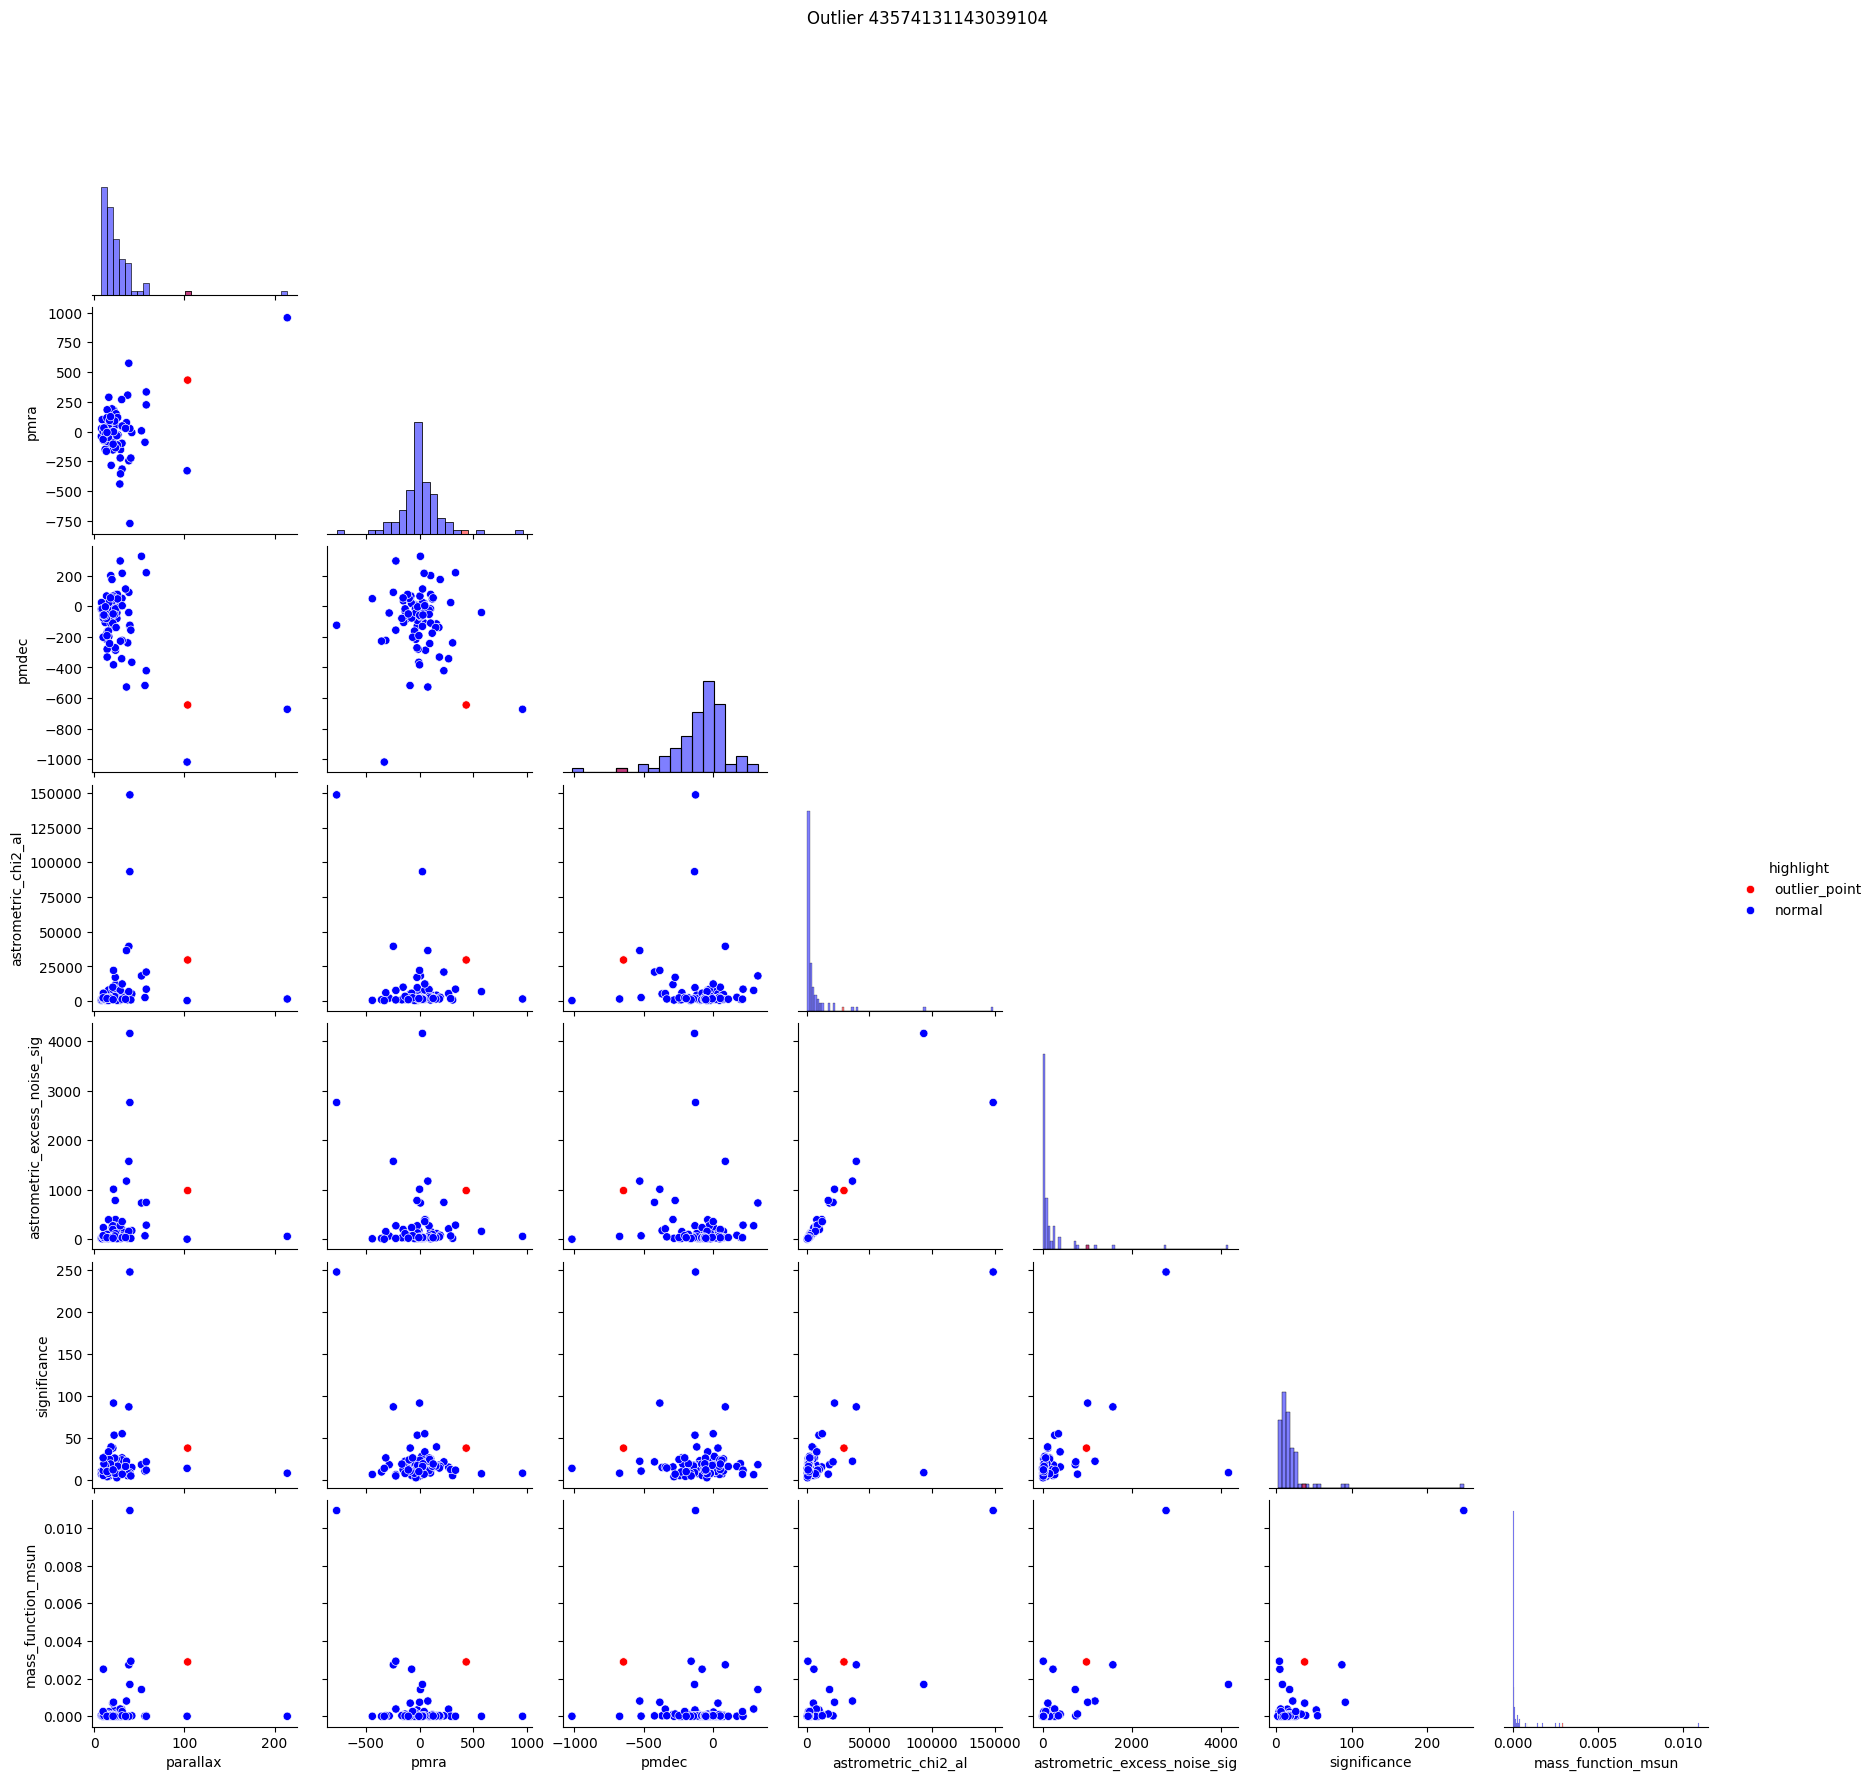

<Figure size 1000x1000 with 0 Axes>

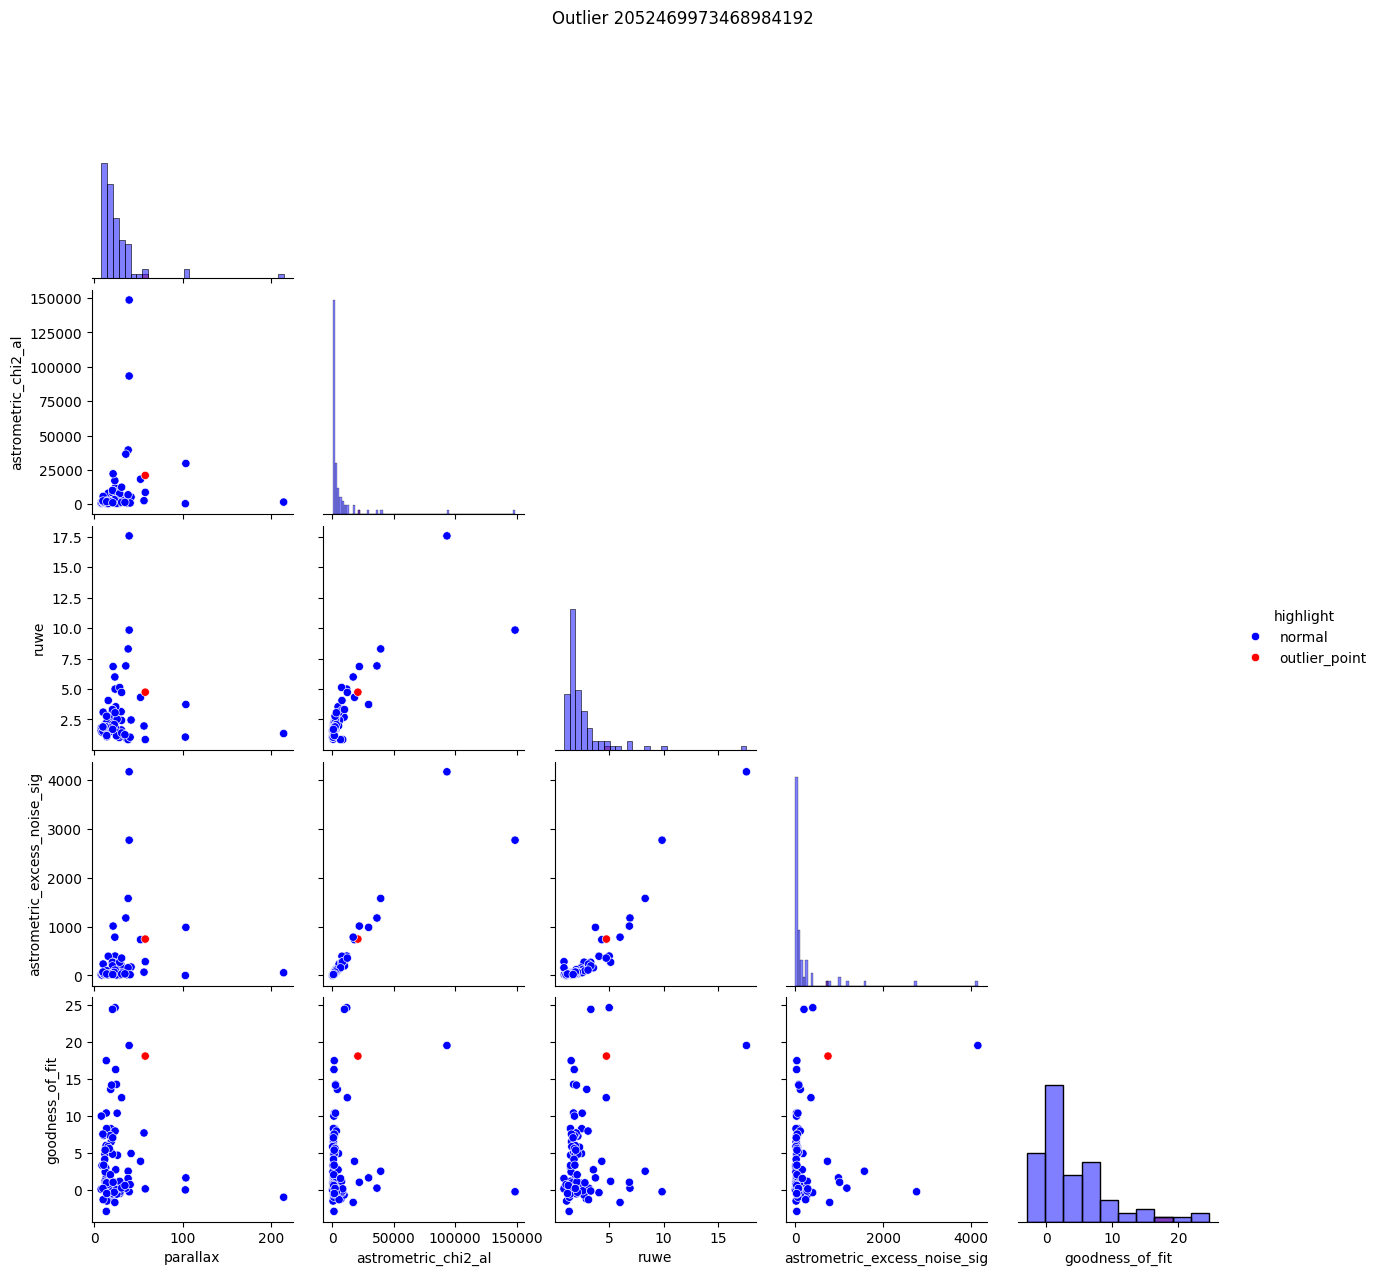

<Figure size 1000x1000 with 0 Axes>

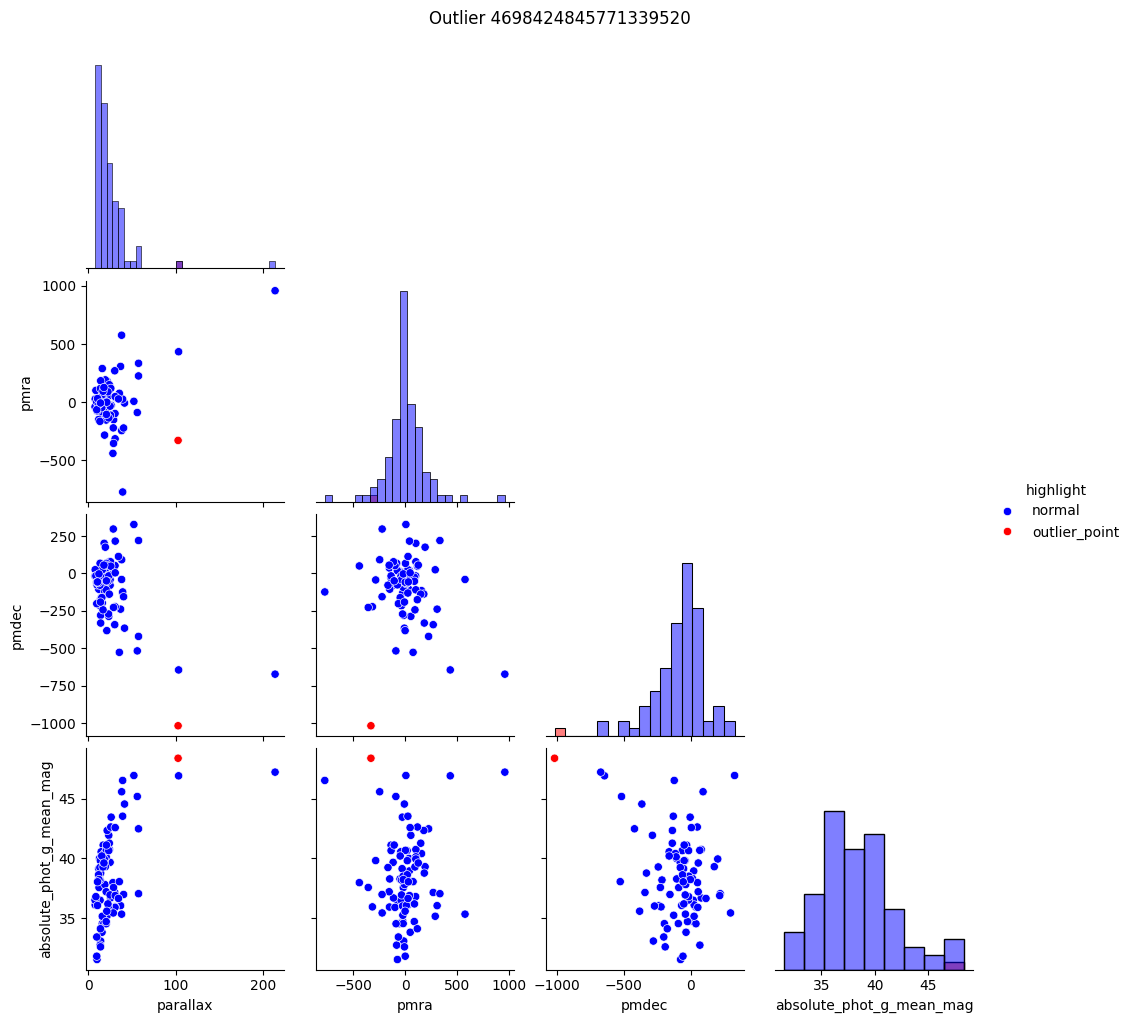

<Figure size 1000x1000 with 0 Axes>

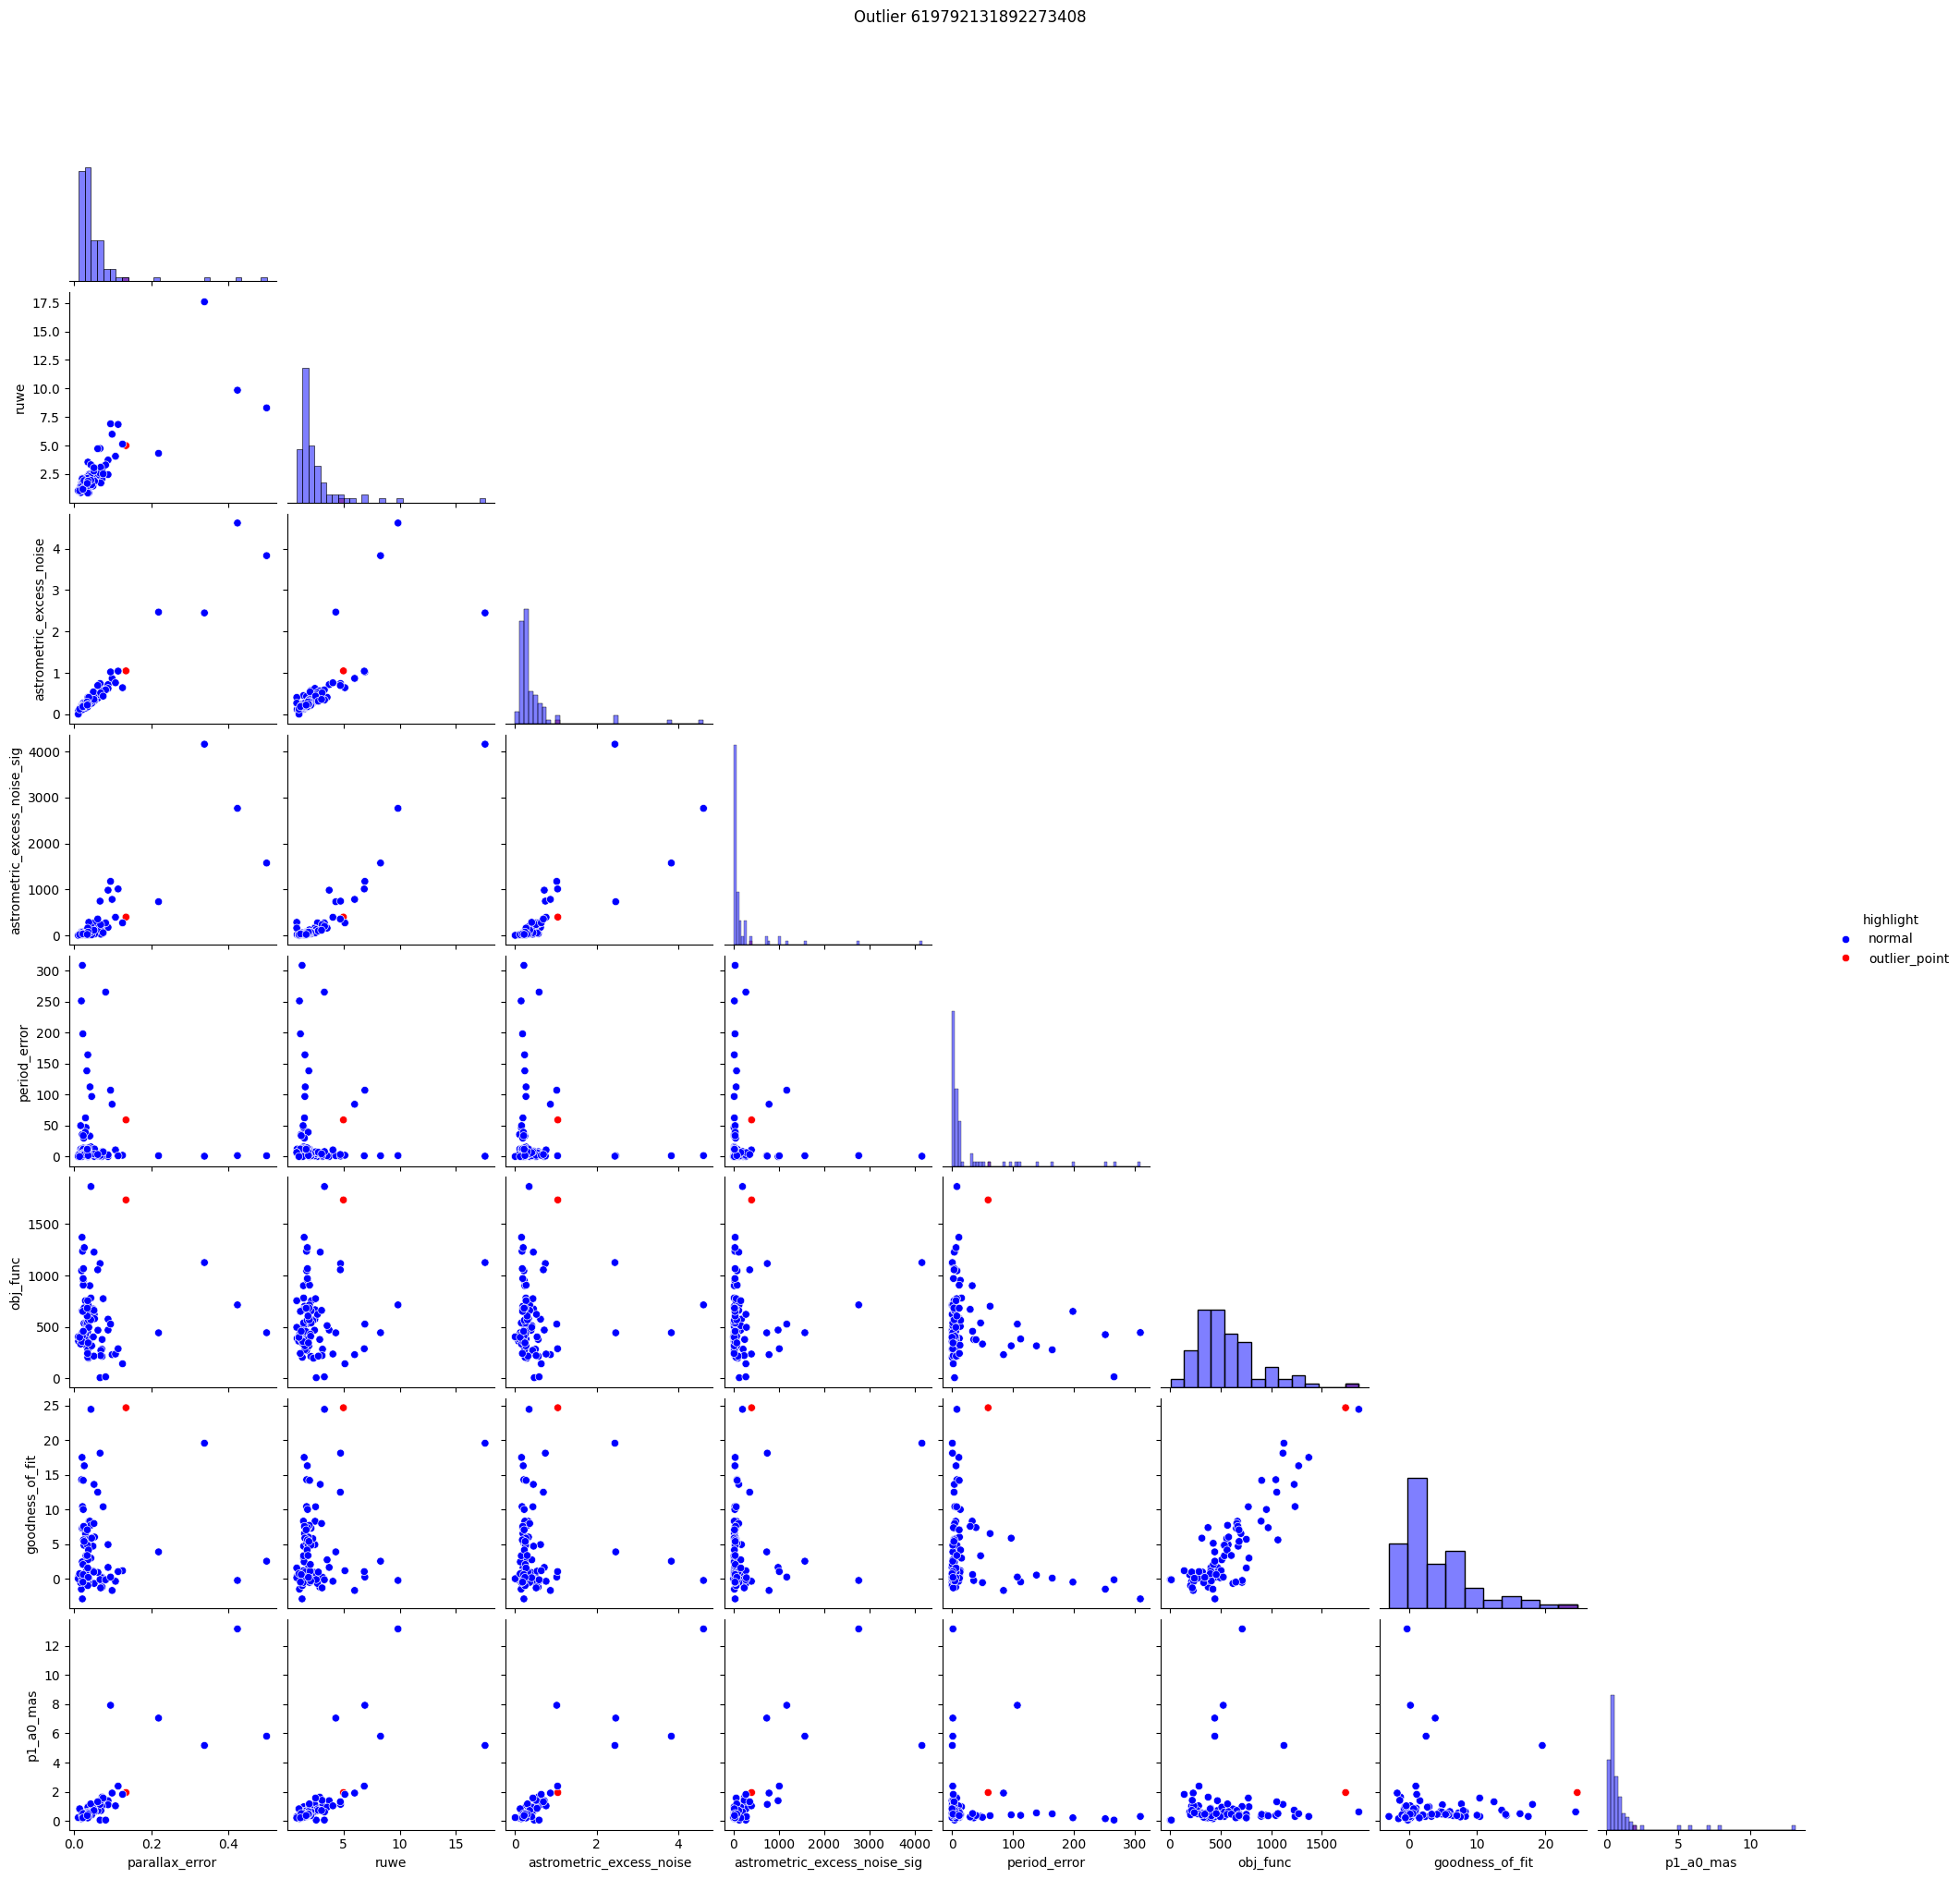

<Figure size 1000x1000 with 0 Axes>

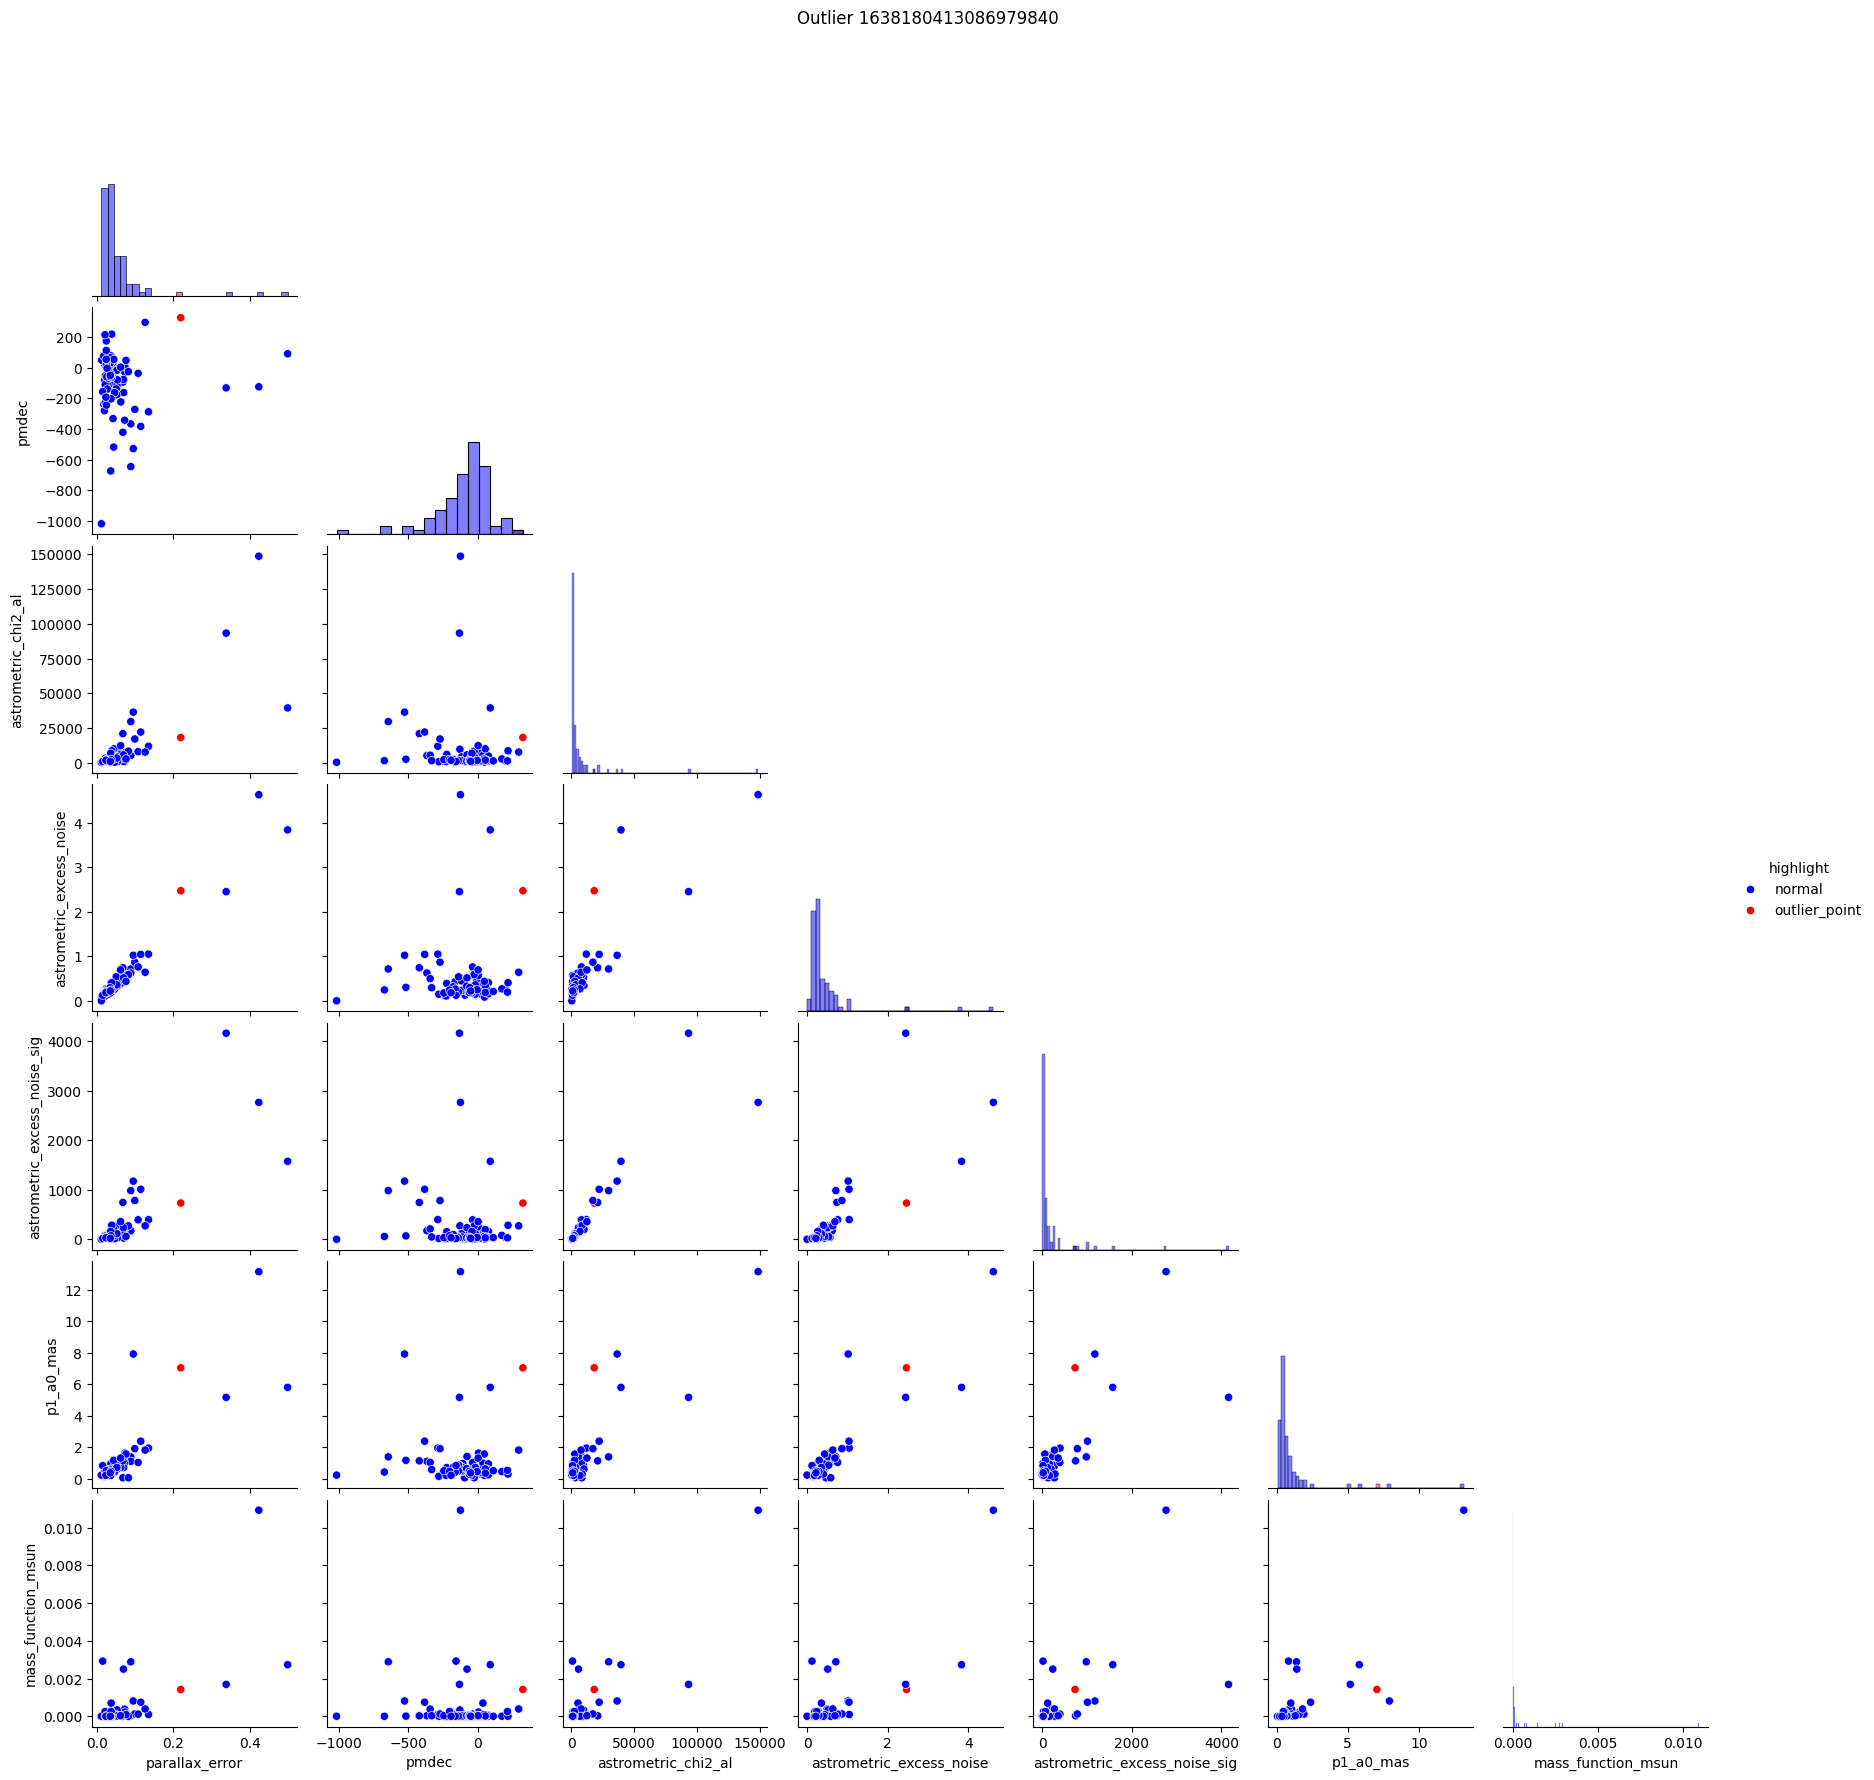

<Figure size 1000x1000 with 0 Axes>

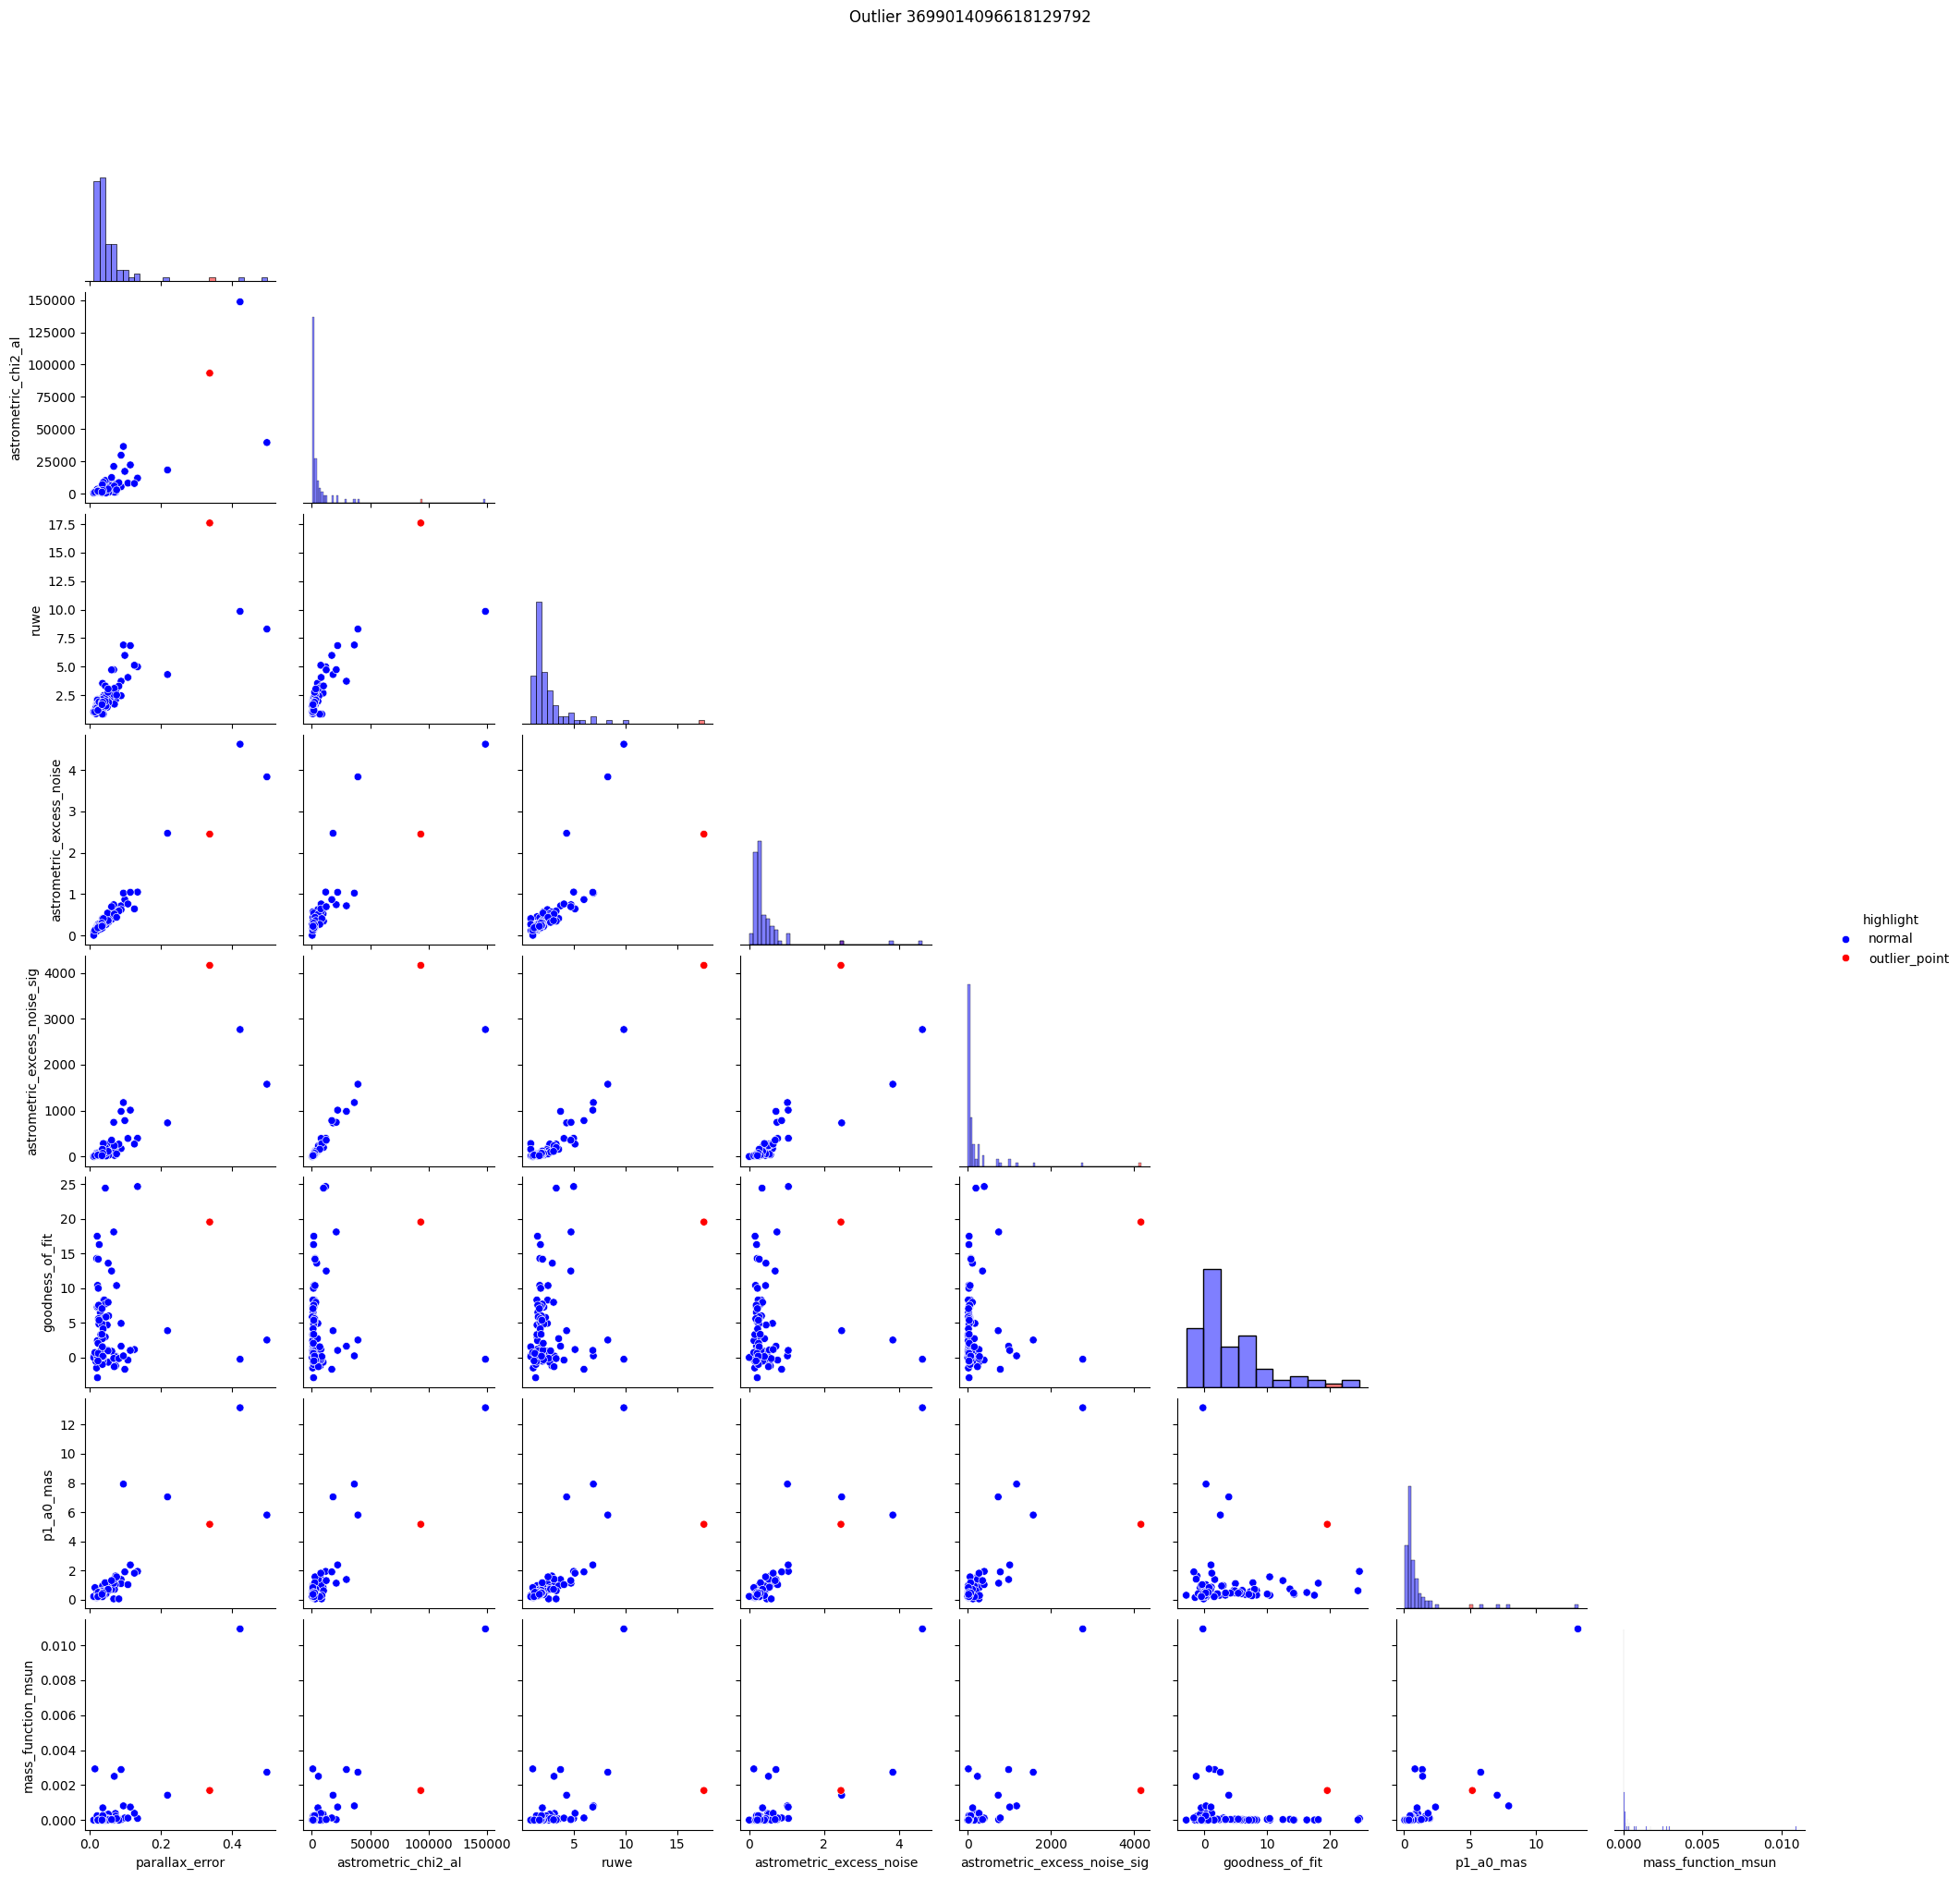

<Figure size 1000x1000 with 0 Axes>

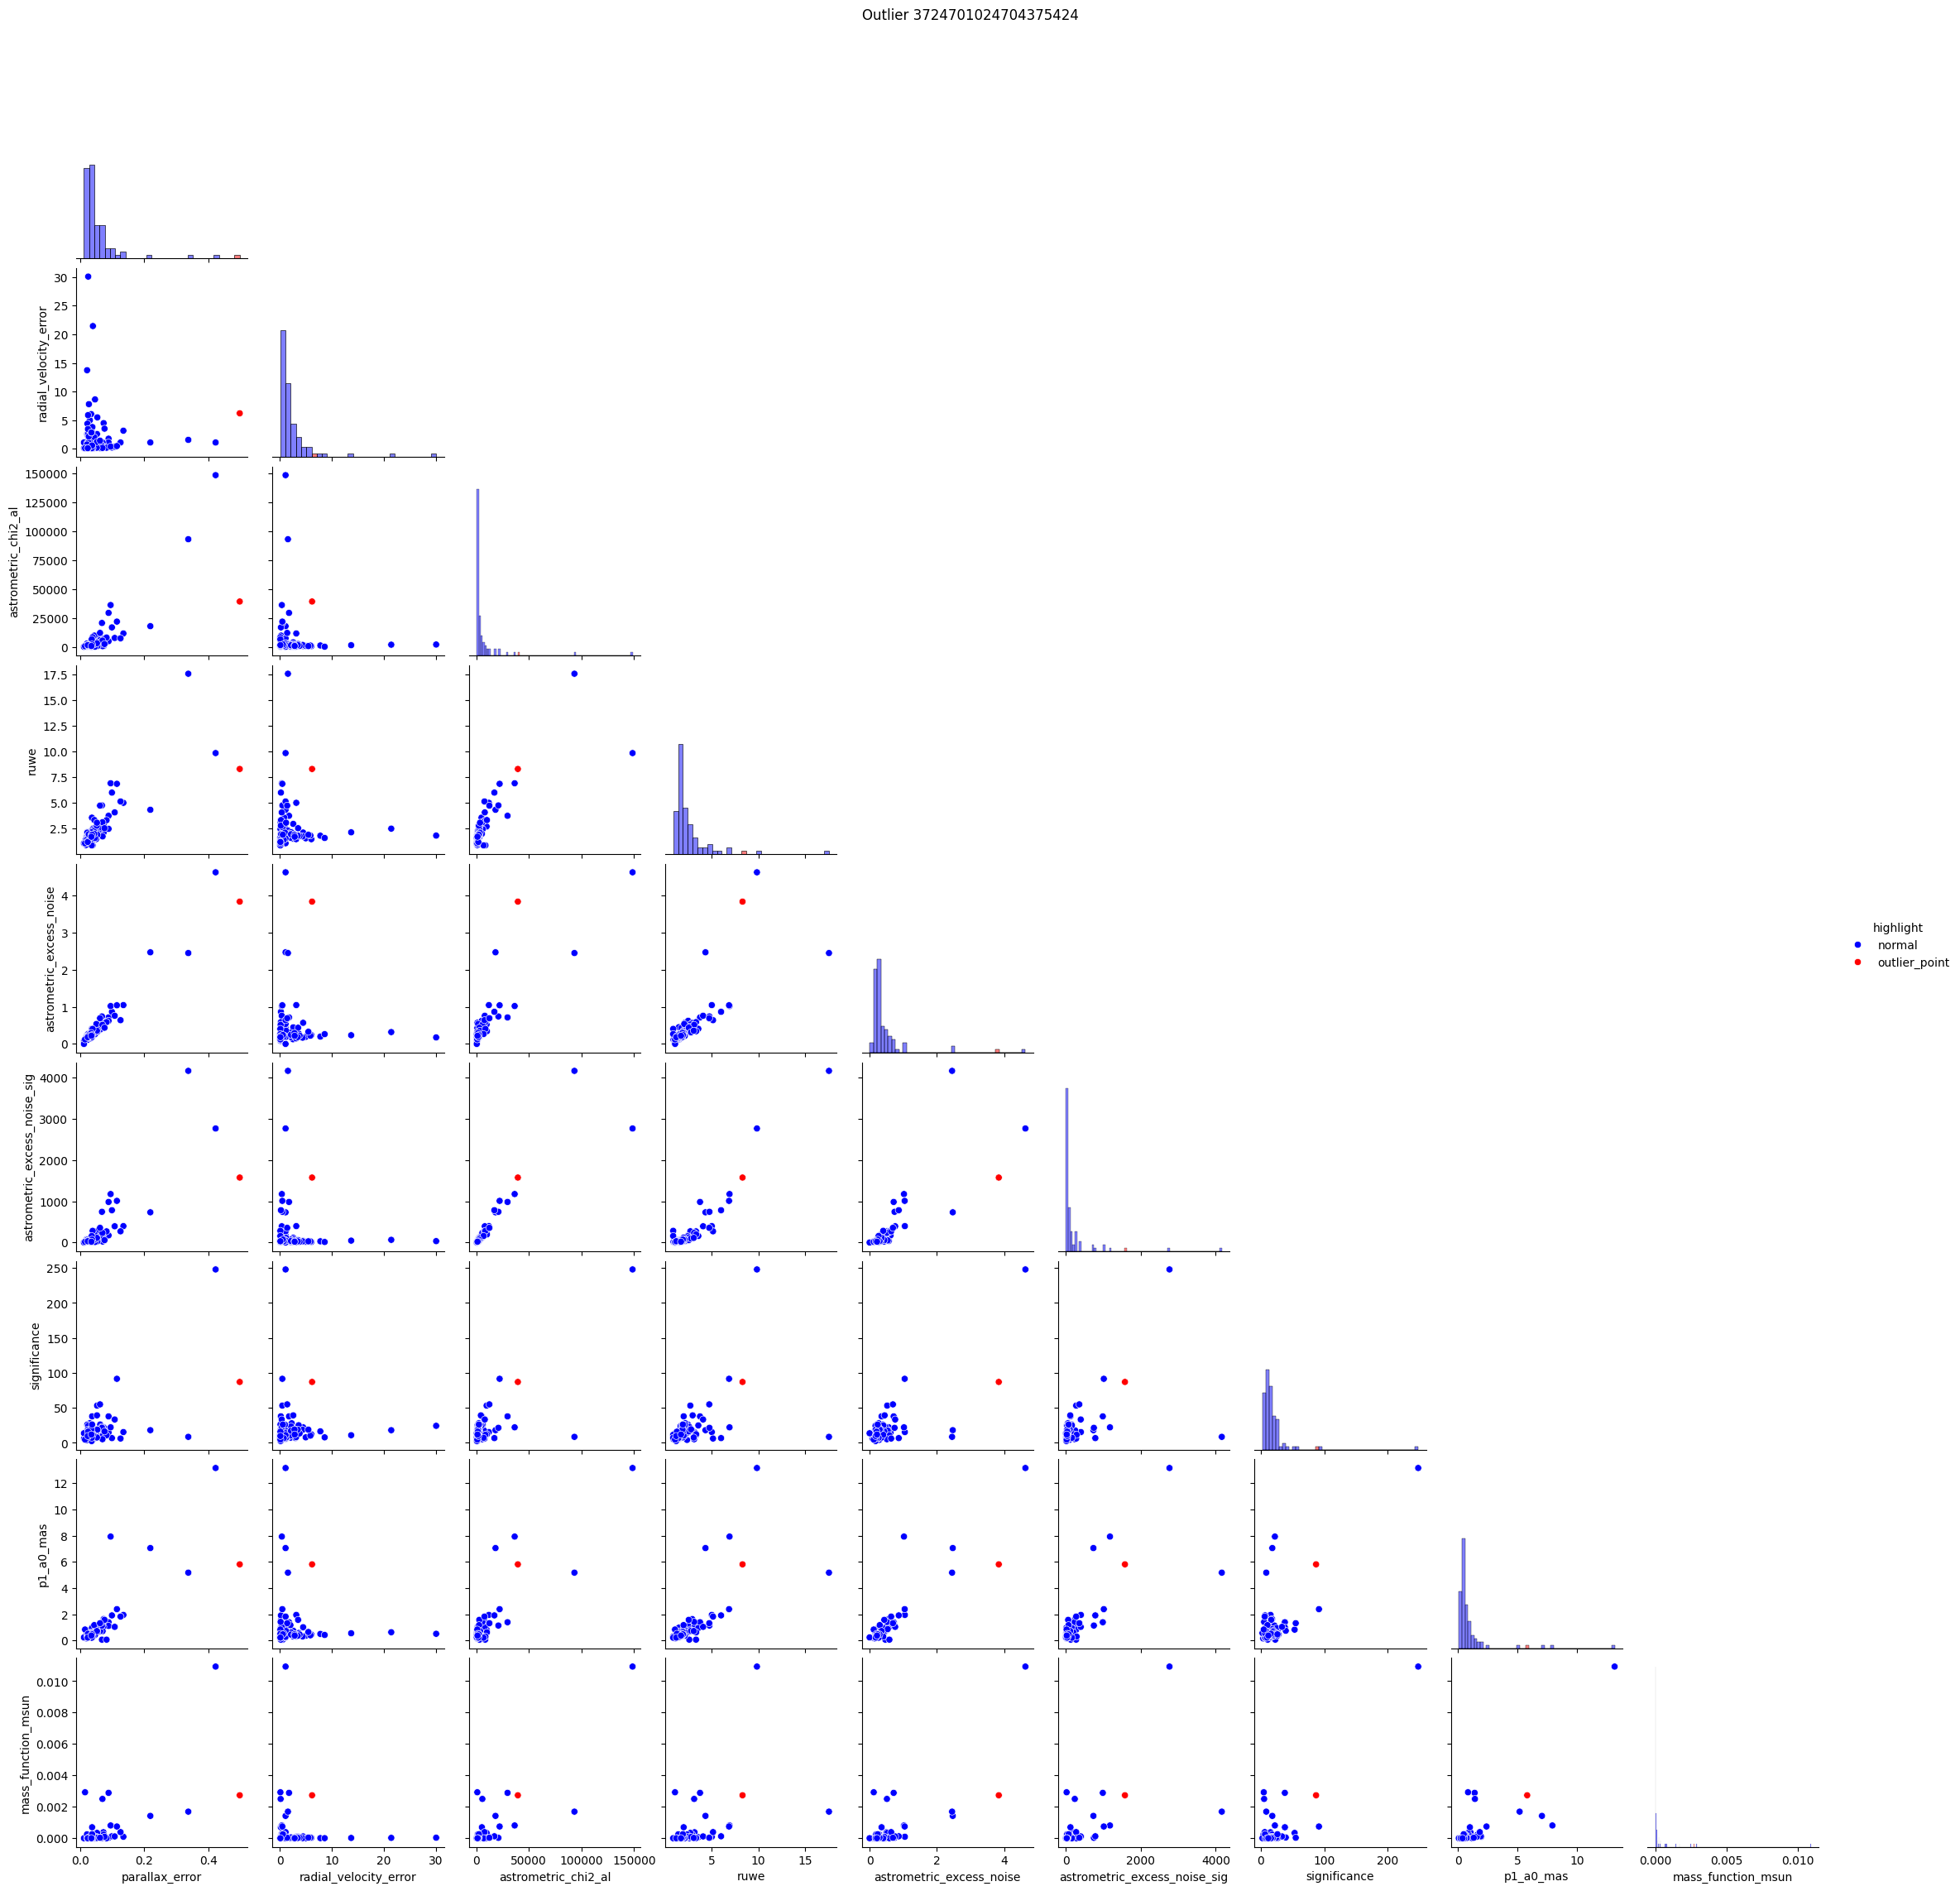

<Figure size 1000x1000 with 0 Axes>

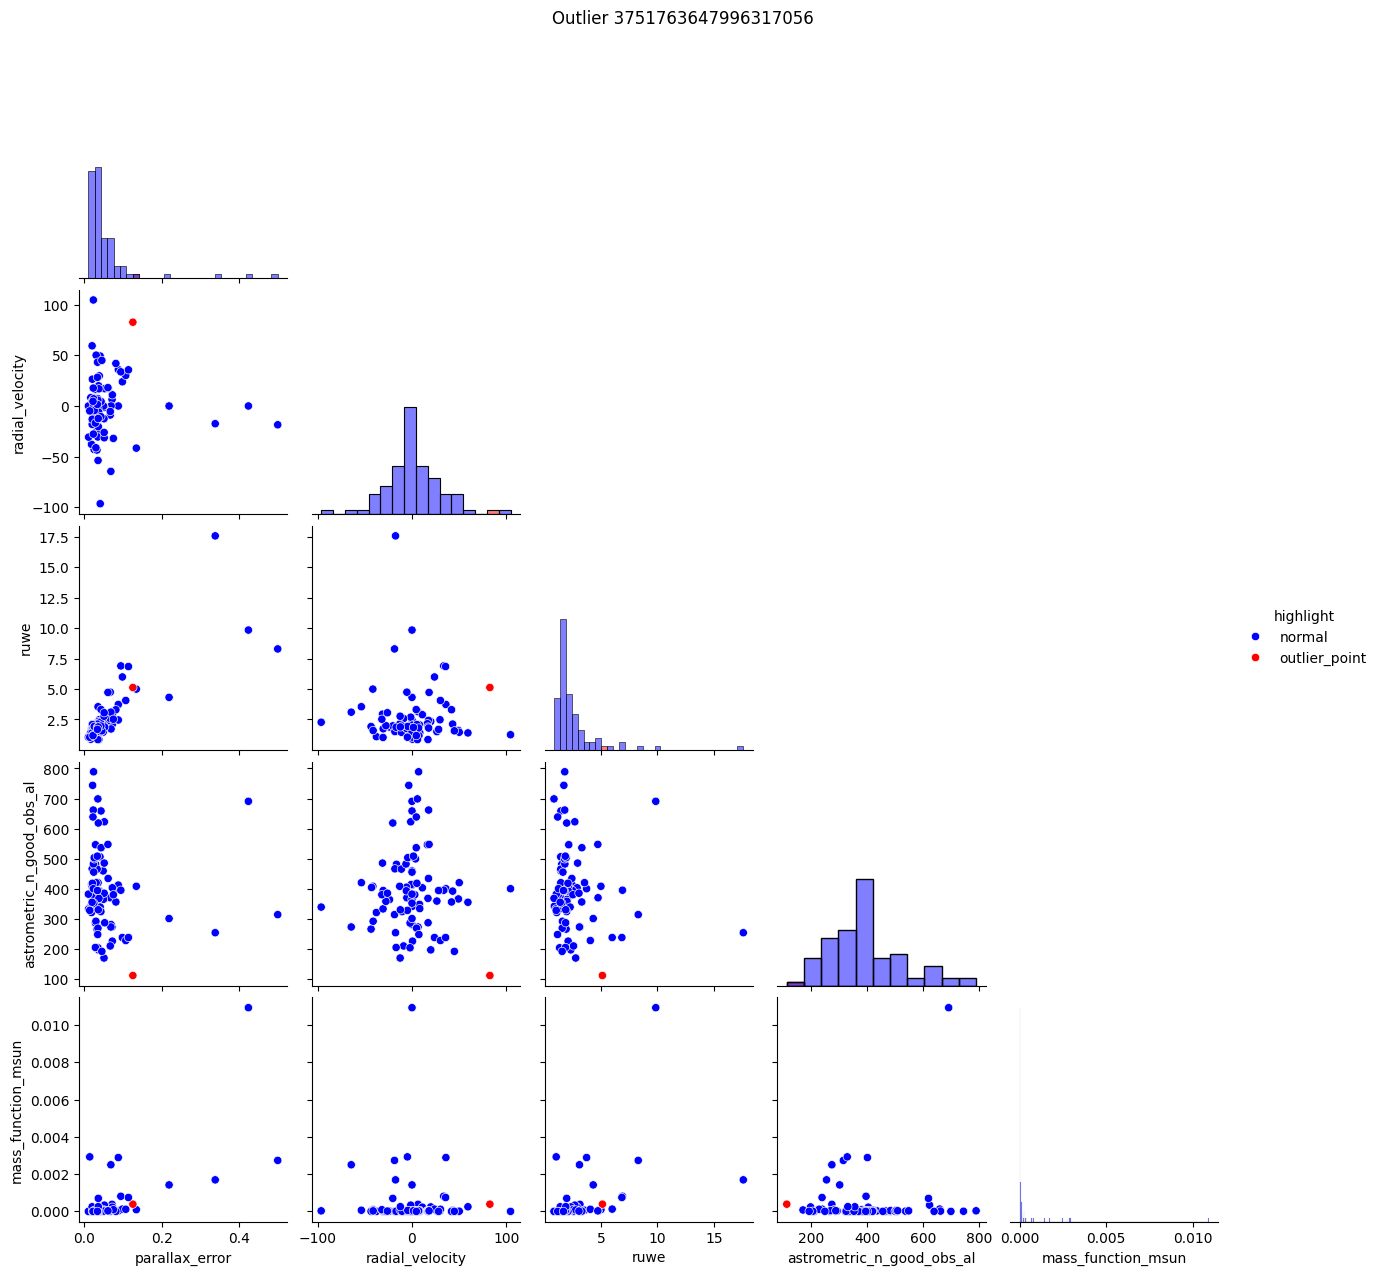

<Figure size 1000x1000 with 0 Axes>

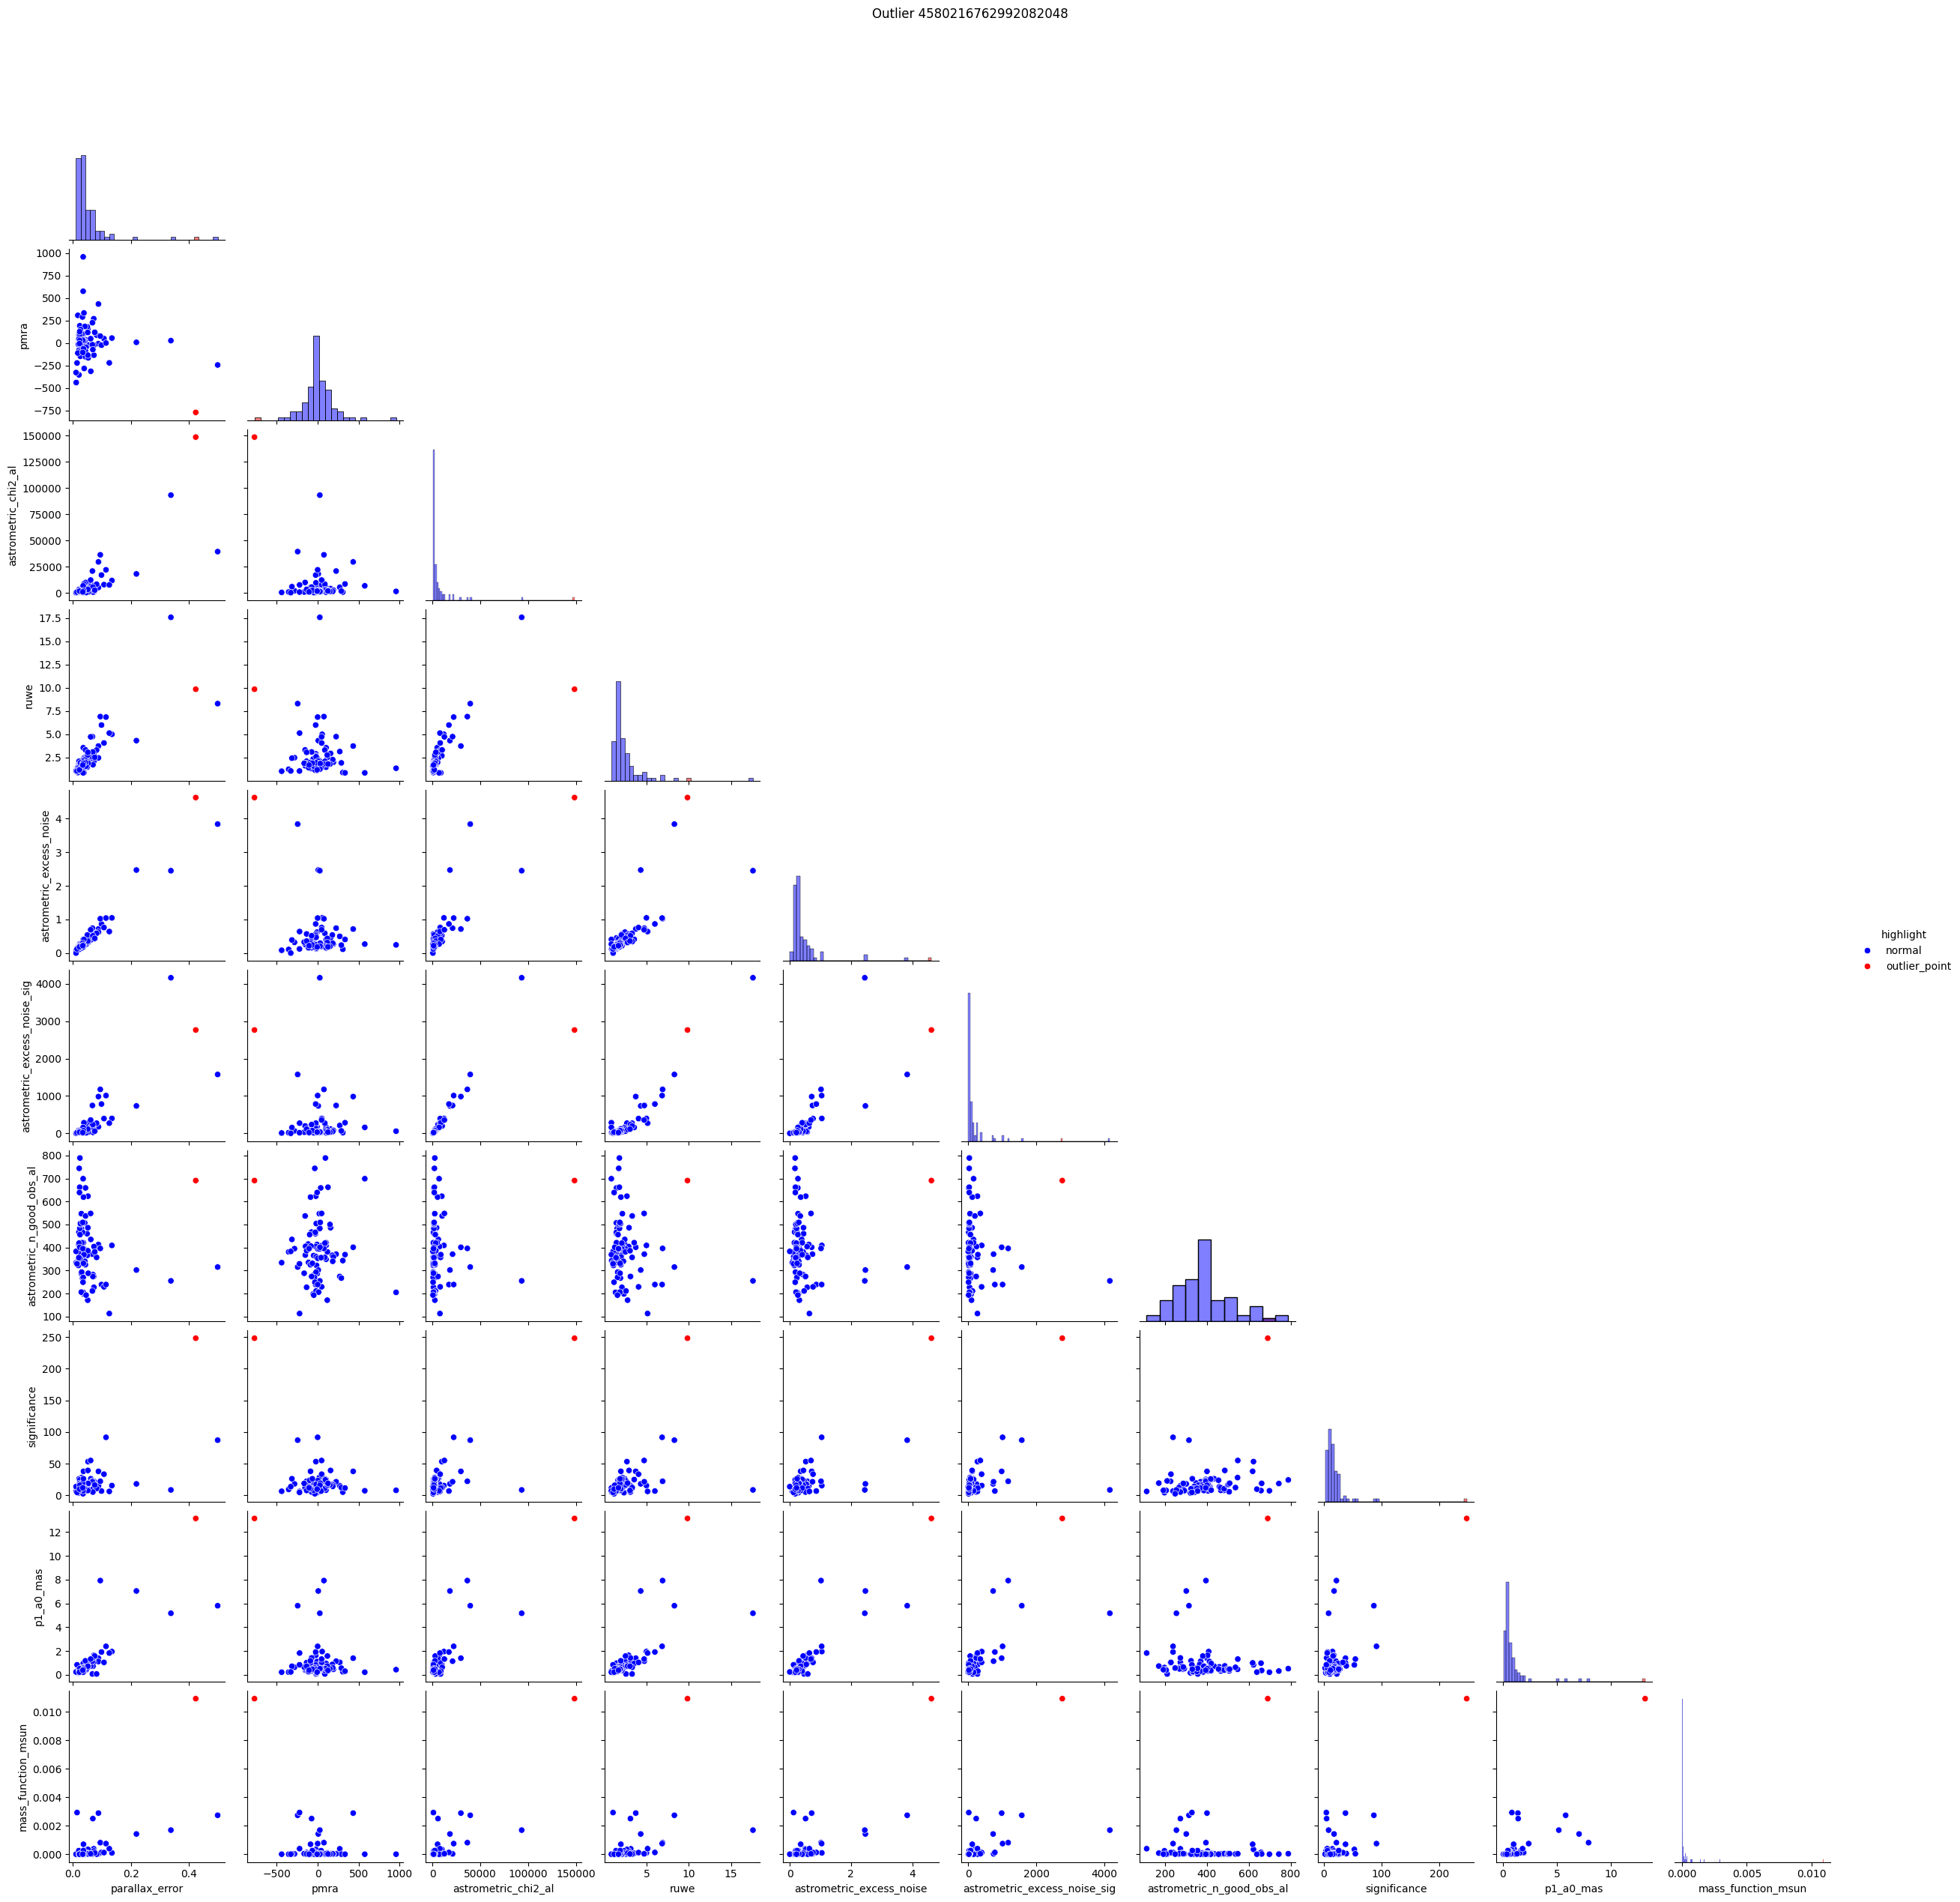

<Figure size 1000x1000 with 0 Axes>

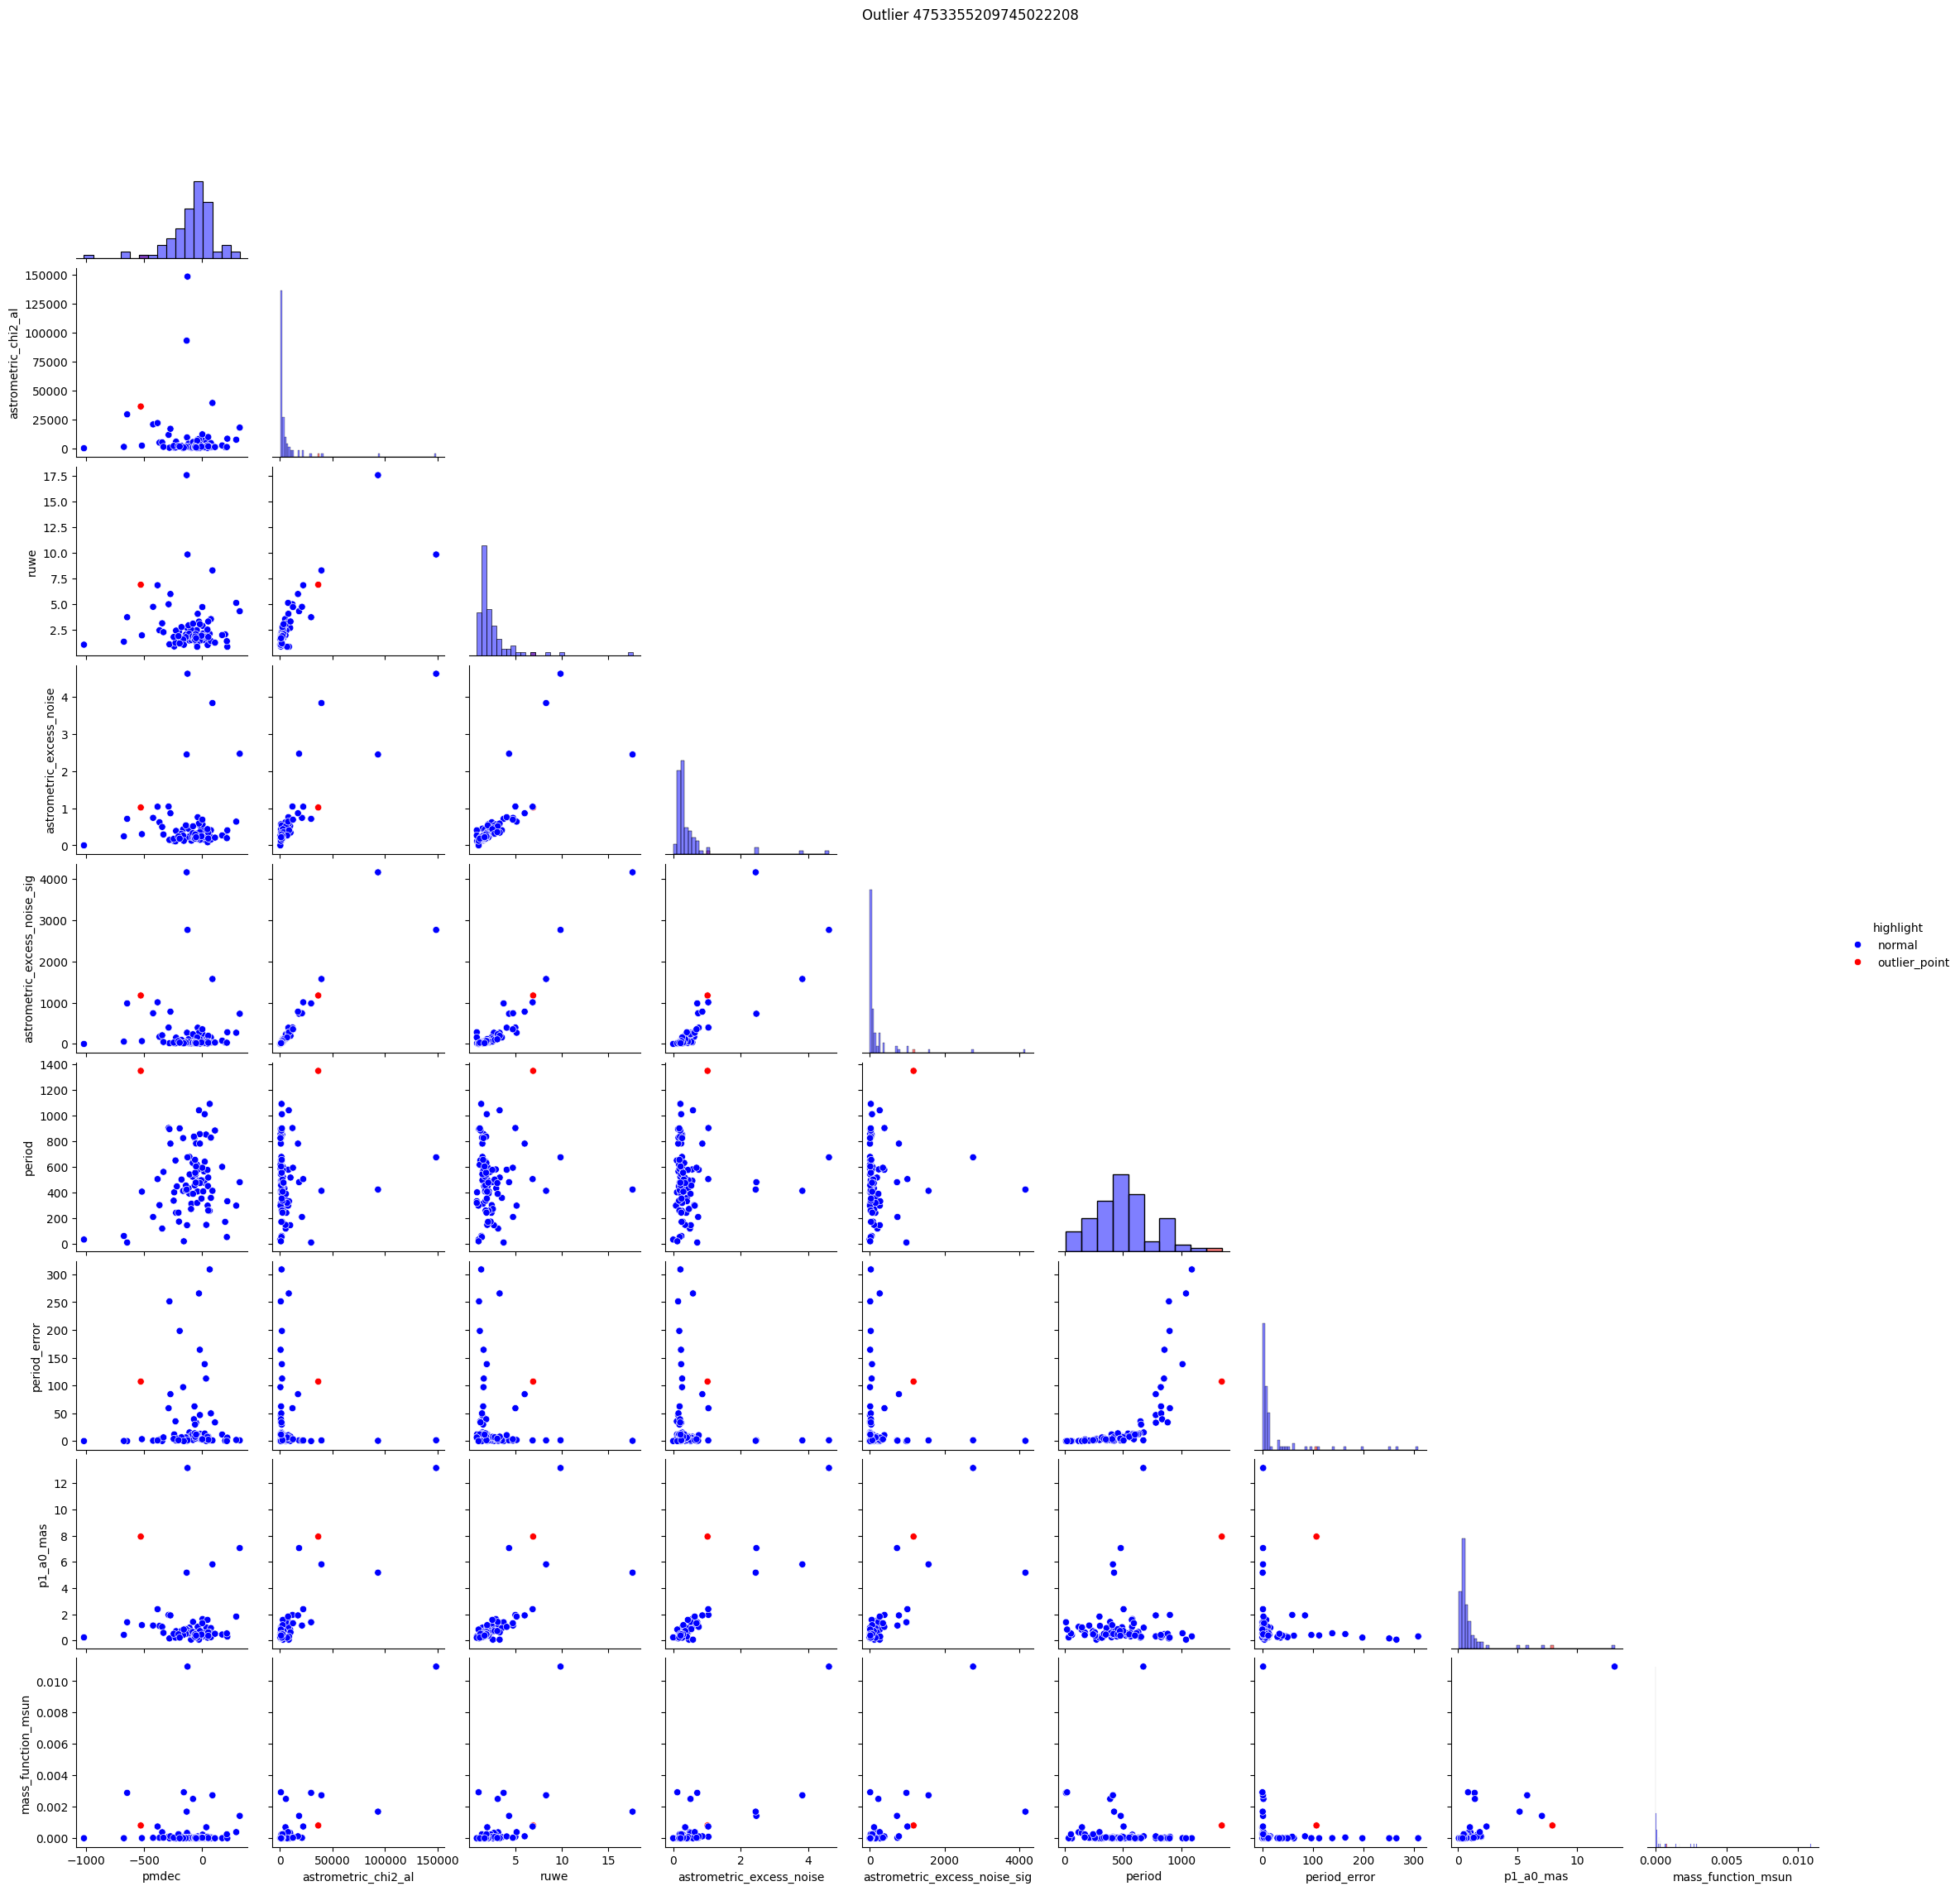

<Figure size 1000x1000 with 0 Axes>

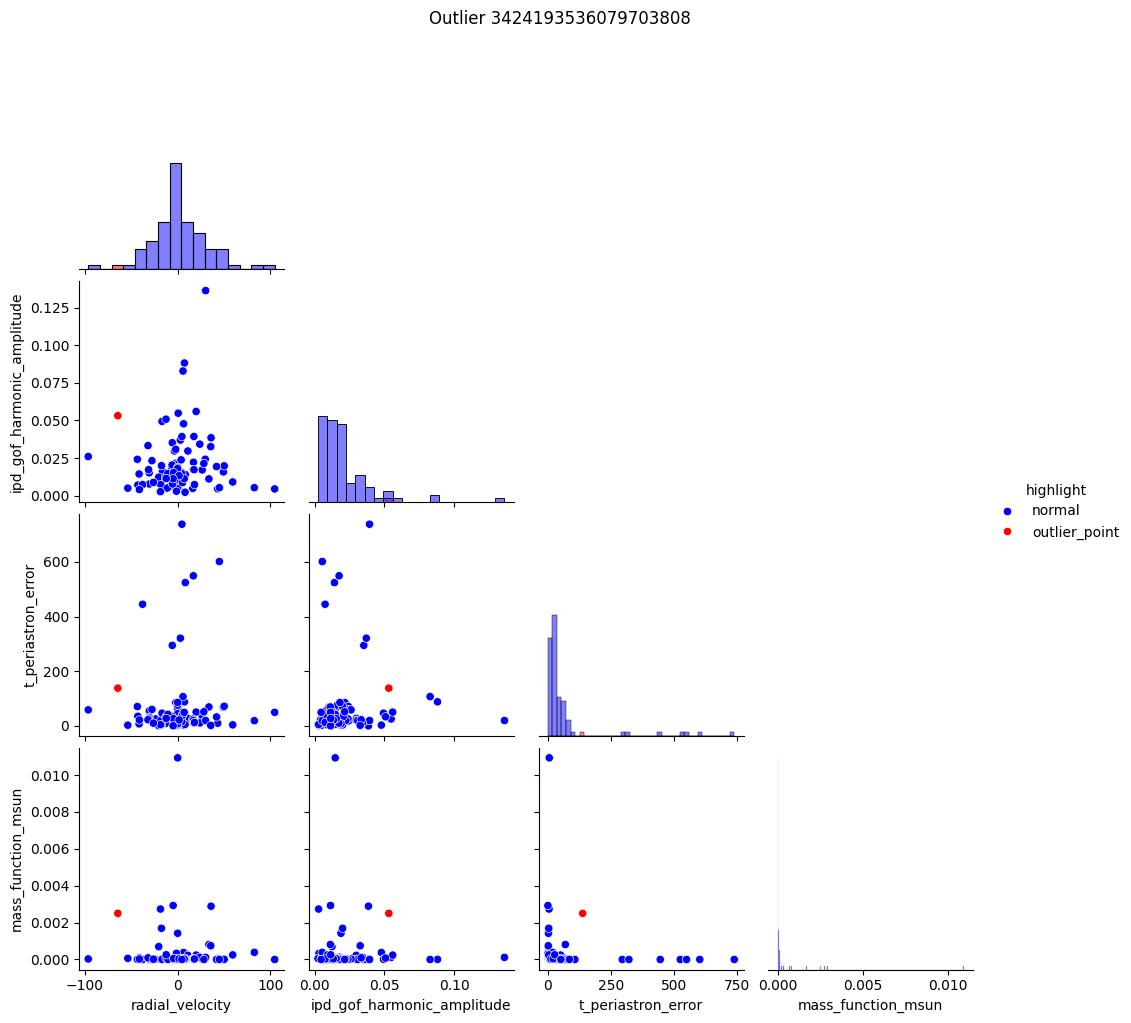

<Figure size 1000x1000 with 0 Axes>

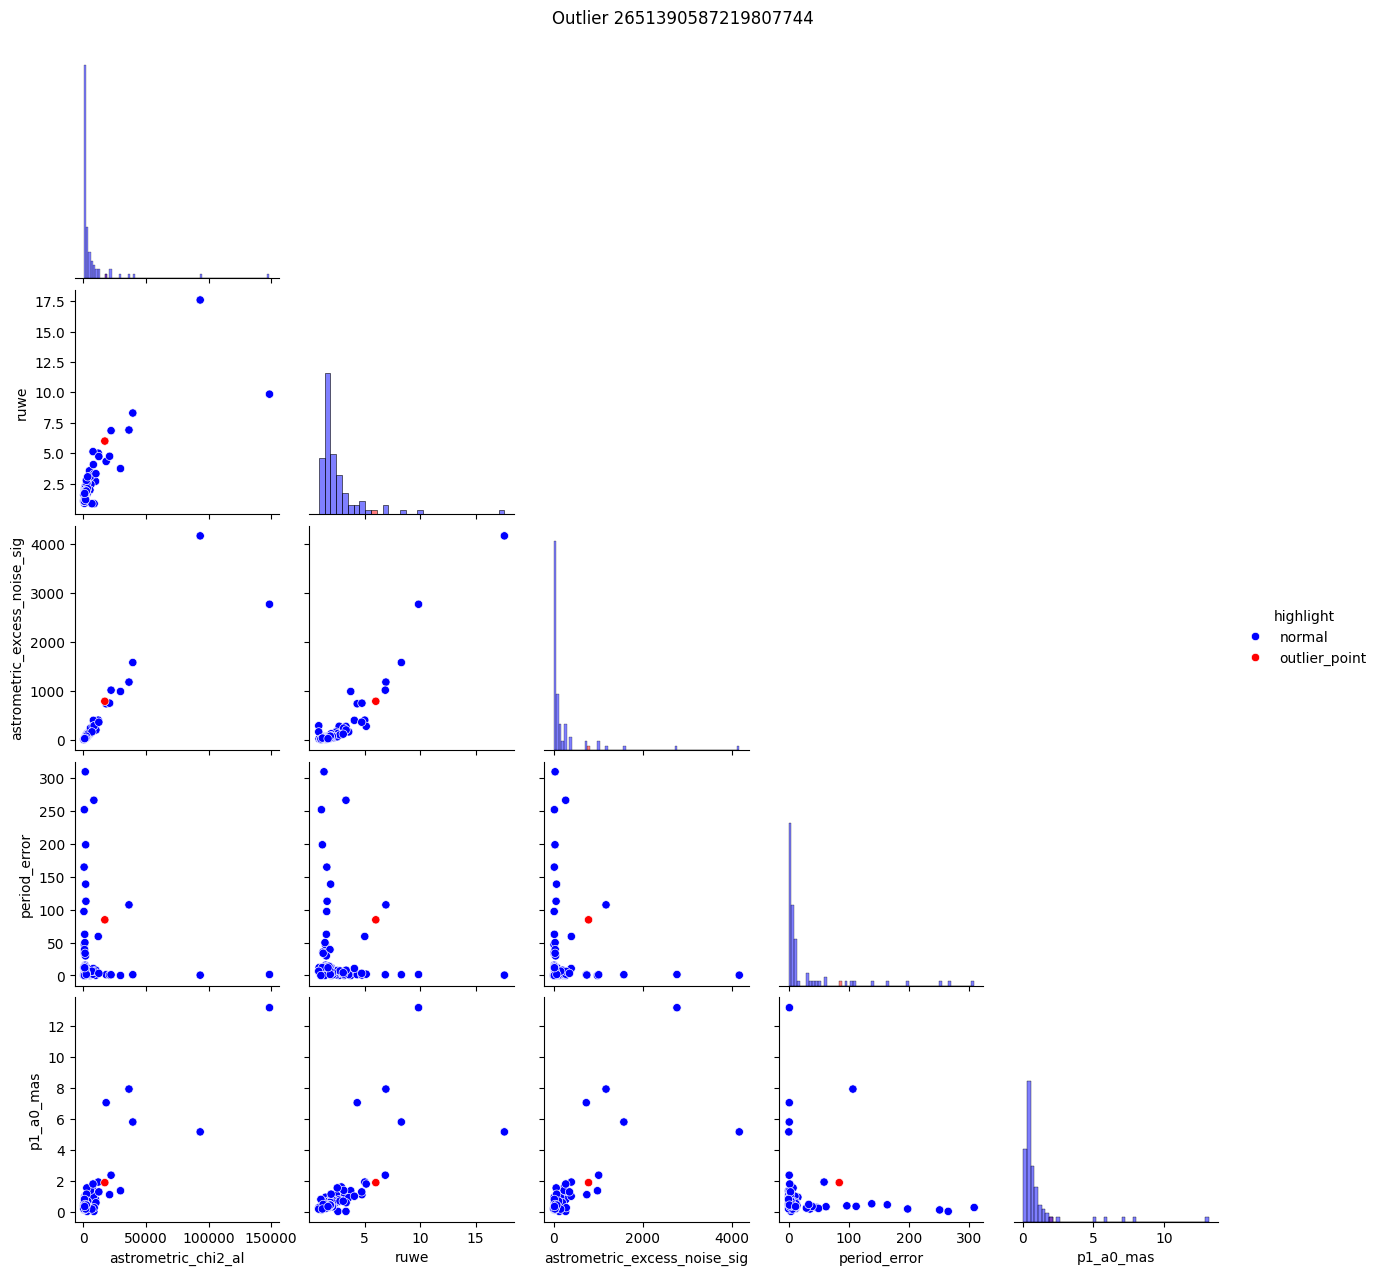

<Figure size 1000x1000 with 0 Axes>

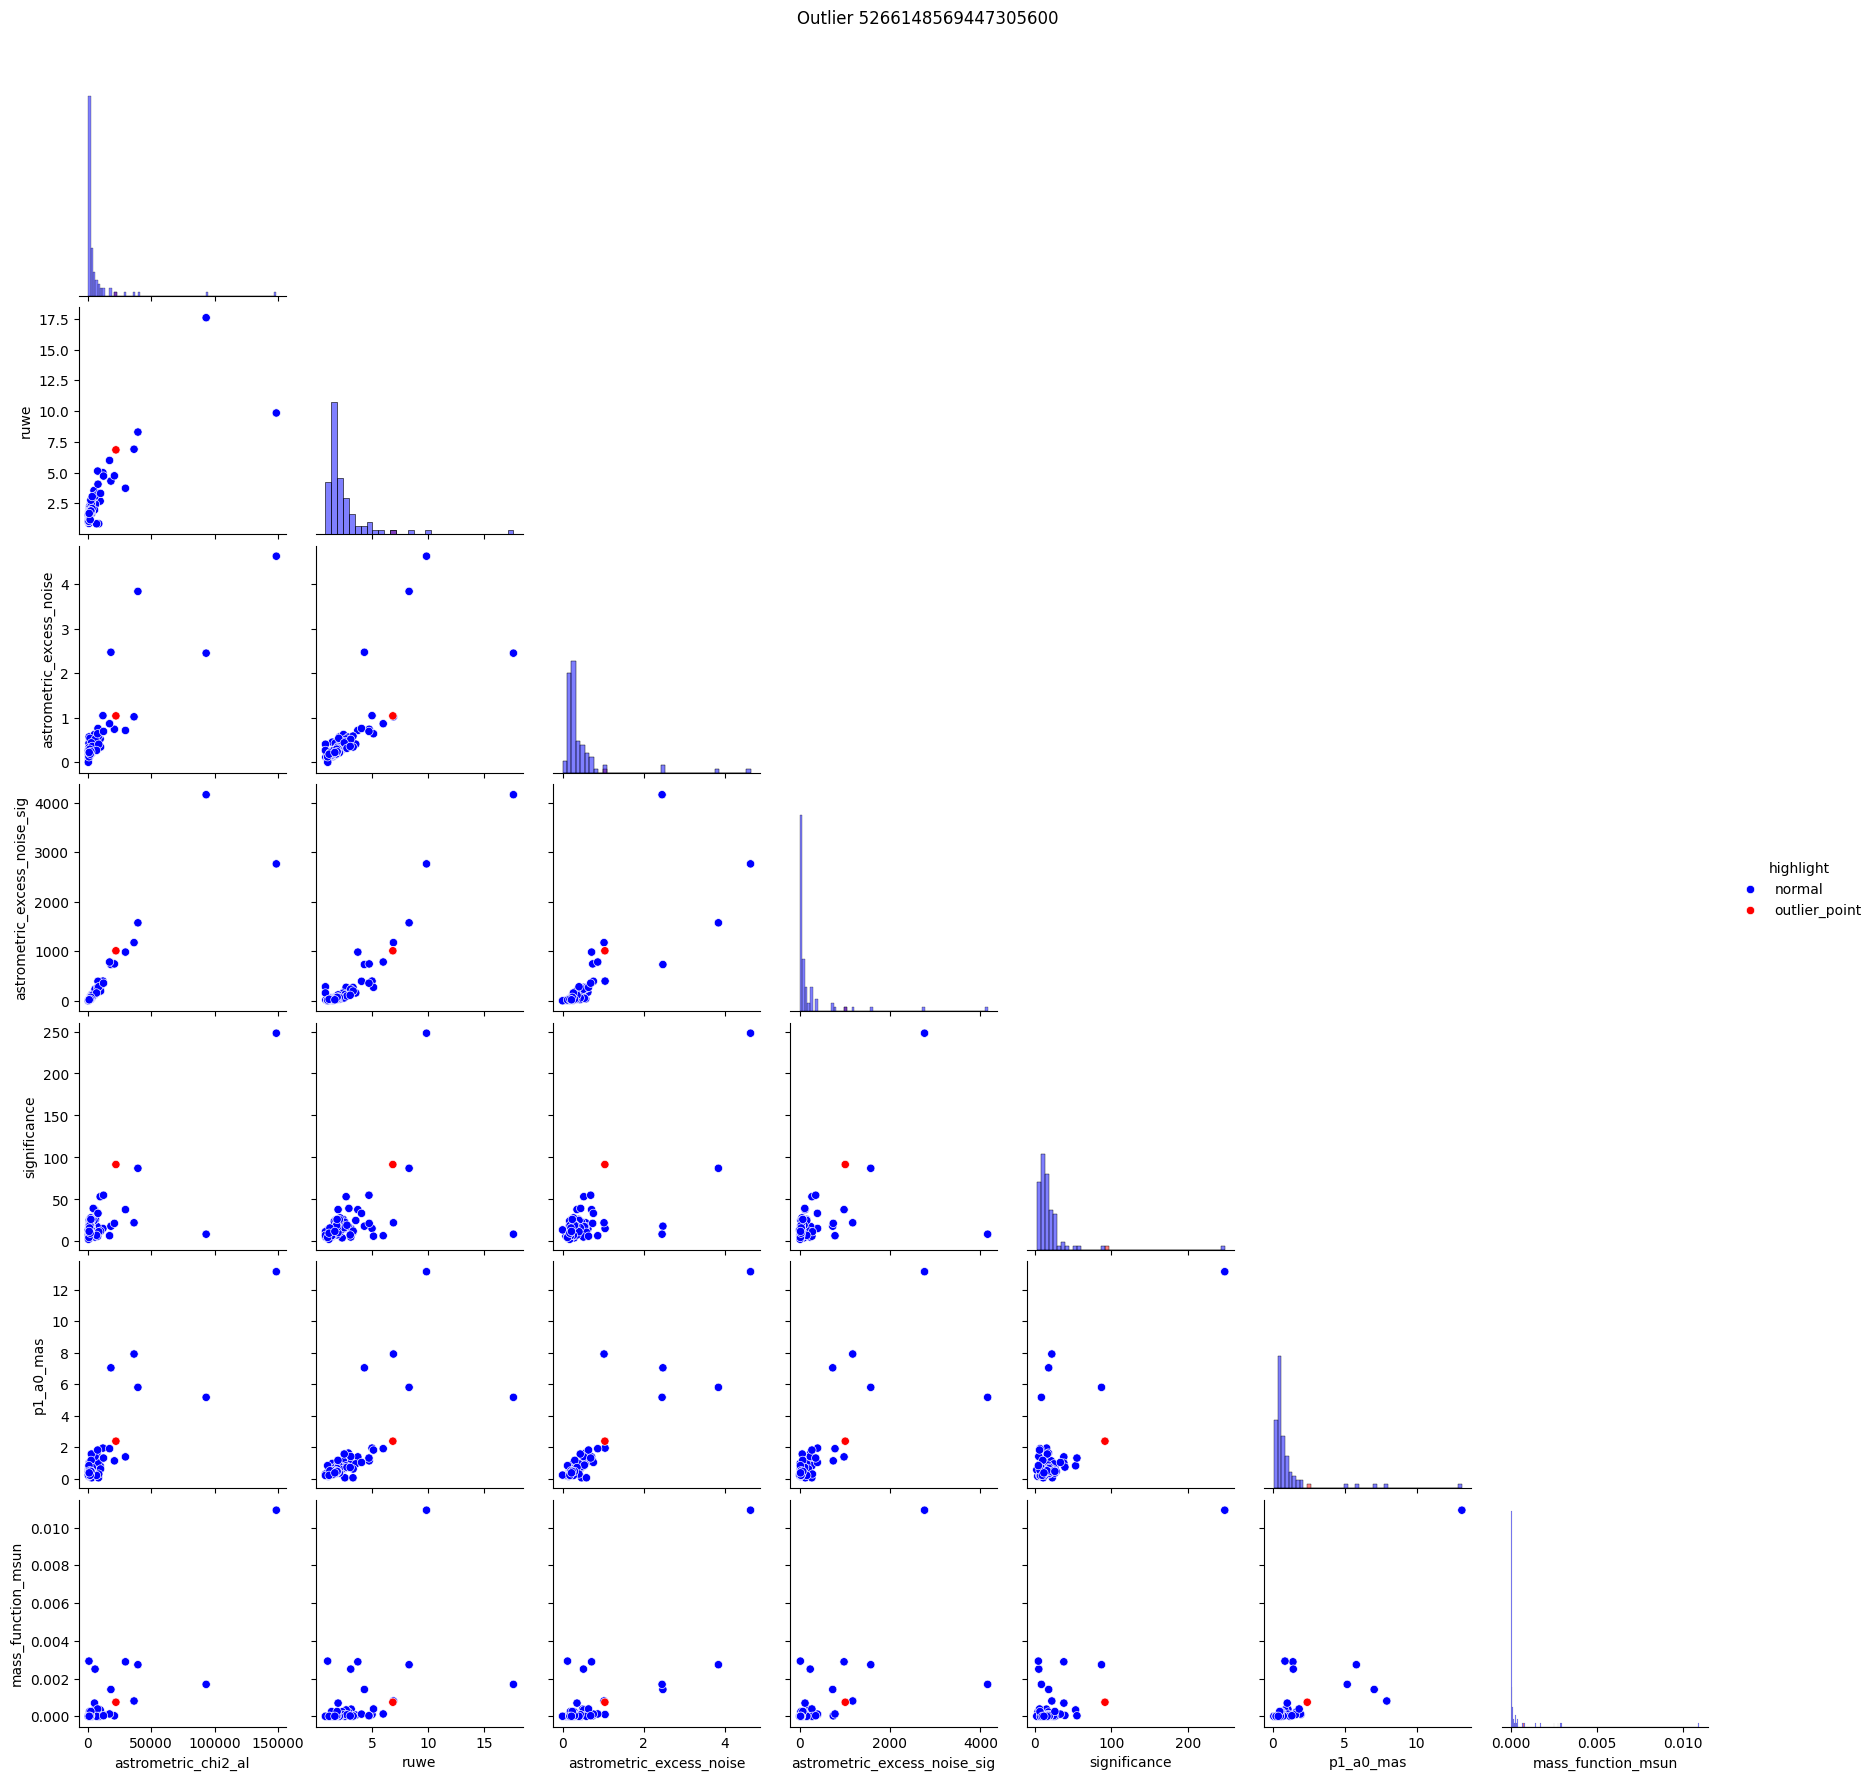

In [14]:
#Visualizing the outliers with their features to self evaluate the outliers

for idx, features in outliers_dict.items():
    if len(features) >= 4:
        source_id = df.loc[idx, 'source_id']
        classification = df.loc[idx, 'binary']

        subset = df[features].copy()

        subset['highlight'] = 'normal'
        subset.loc[idx, 'highlight'] = 'outlier_point'

        plt.figure(figsize=(10, 10))
        sns.pairplot(subset, diag_kind='hist', corner=True, hue='highlight', 
                     palette={'normal': 'blue', 'outlier_point': 'red'})

        plt.suptitle(f'Outlier {source_id}', y=1.02)
        plt.show()


In [15]:
outlier_source_ids = [
4698424845771339520,
3699014096618129792,
3724701024704375424,
4580216762992082048
]

# Remove the outliers from the dataset
df_full = df_full[~df_full['source_id'].isin(outlier_source_ids)]

### Correlations

In [16]:
numeric_df = df_full.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=['source_id'])

corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.9
high_corr_pairs = [
    (row, col, corr_matrix.loc[row, col])
    for row in upper.index
    for col in upper.columns
    if upper.loc[row, col] > threshold
]

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

print(high_corr_df.to_string(index=False))


               Feature 1                    Feature 2  Correlation
          parallax_error     astrometric_excess_noise     0.939279
     astrometric_chi2_al astrometric_excess_noise_sig     0.979423
                   bp_rp     phot_bp_rp_excess_factor     0.997644
                   bp_rp              phot_g_mean_mag     0.911334
                   bp_rp             phot_bp_mean_mag     0.941708
phot_bp_rp_excess_factor              phot_g_mean_mag     0.901047
phot_bp_rp_excess_factor             phot_bp_mean_mag     0.933137
         phot_g_mean_mag             phot_rp_mean_mag     0.999047
         phot_g_mean_mag             phot_bp_mean_mag     0.996588
        phot_rp_mean_mag             phot_bp_mean_mag     0.992691


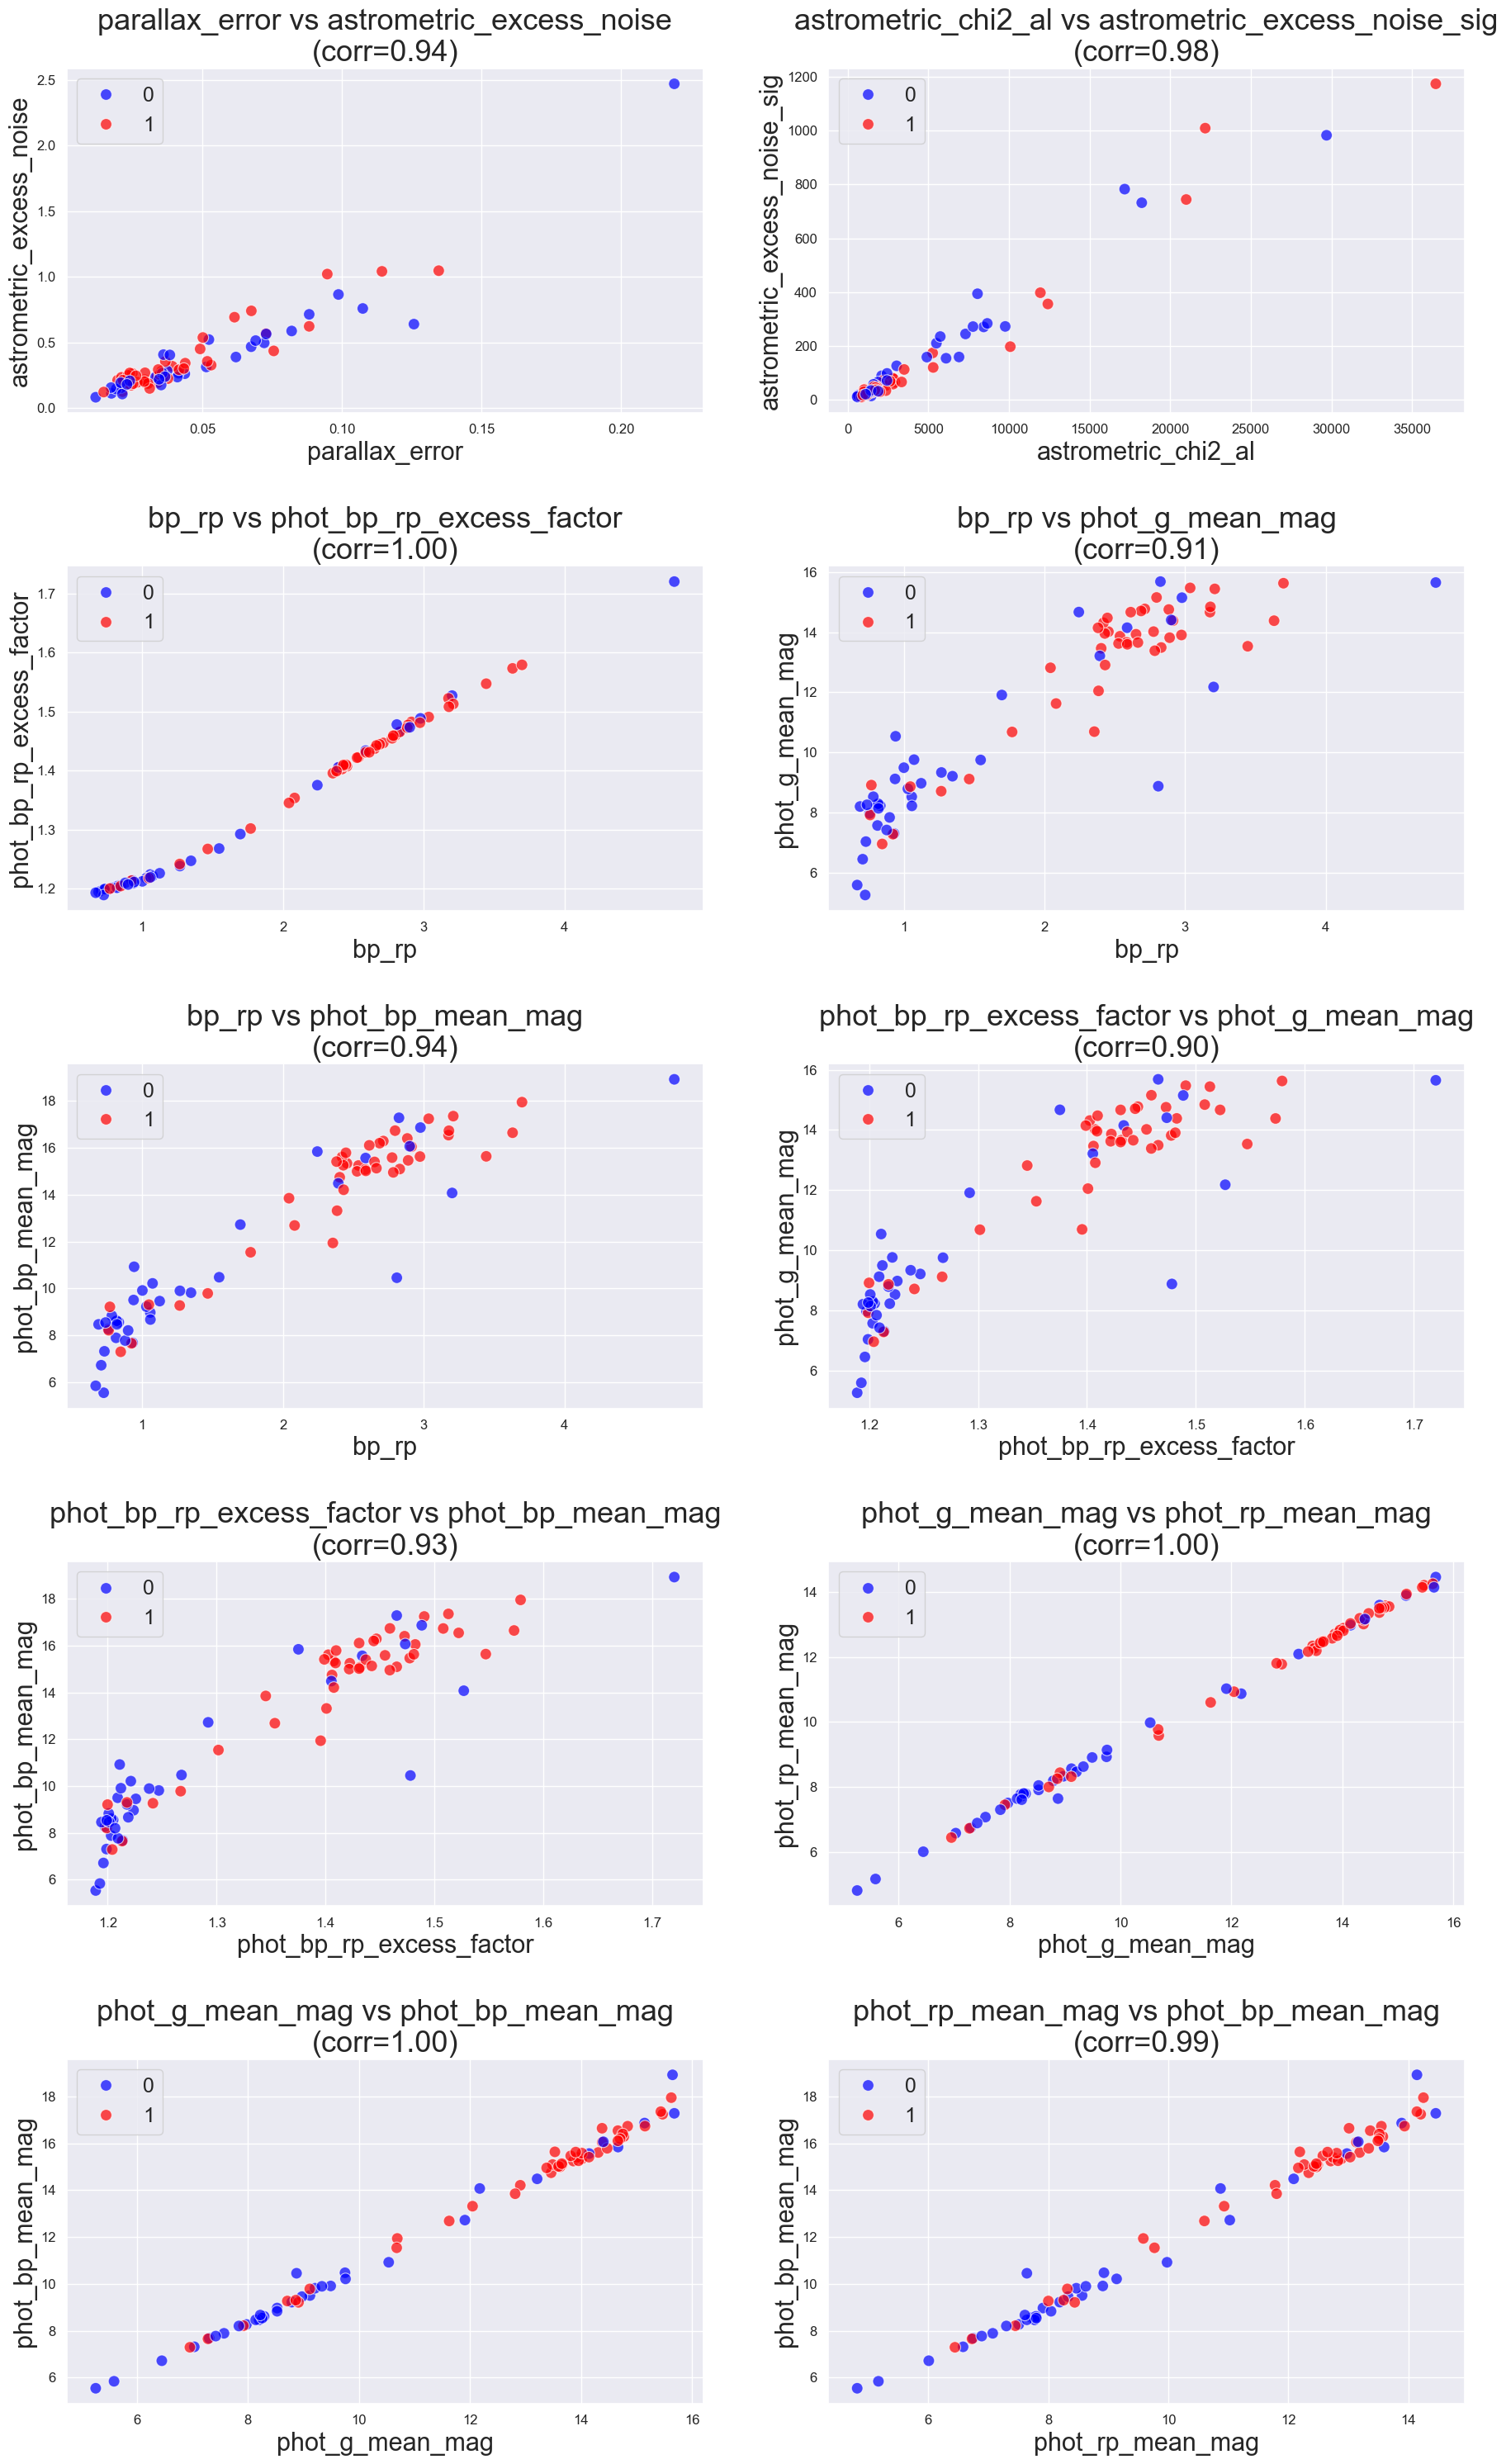

In [50]:
n_cols = 2
n_rows = (len(high_corr_pairs) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 6*n_rows))

palette = {0: "blue", 1: "red"}

for idx, (f1, f2, corr_val) in enumerate(high_corr_pairs, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.scatterplot(
        data=df_full, 
        x=f1, 
        y=f2, 
        hue='binary', 
        palette=palette, 
        alpha=0.7,
        s=100
    )
    plt.title(f'{f1} vs {f2}\n(corr={corr_val:.2f})', fontsize=26)
    plt.xlabel(f1, fontsize=22)
    plt.ylabel(f2, fontsize=22)
    
    plt.legend(fontsize=18, title_fontsize='13')

plt.tight_layout(w_pad=4.0, h_pad=3.0)
plt.show()

### Make CSV

In [18]:
df_last_4 = df[df['binary'] == -1]
df_last_4 = df_last_4.drop(columns=['binary'])

df_full.to_csv("dataset_full.csv", index=False) #dataset
df_last_4.to_csv("dataset_unseen.csv", index=False) #unseen data

df_last_4

,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,visibility_periods_used,radial_velocity,radial_velocity_error,...,obj_func,goodness_of_fit,efficiency,significance,p1_a0_mas,mass_function_msun,p1_omega_deg,p1_OMEGA_deg,p1_incl_deg,absolute_phot_g_mean_mag
14,726588585356221568,152.139403,24.772350,14.757411,0.069504,-42.661135,-162.338425,17,0.000000,1.118017,...,271.668060,0.186515,0.0,10.067146,0.713480,0.000089,1.612167,2.248219,1.067532,40.542522
25,1336053176328998144,263.533701,35.505865,12.024120,0.025873,-148.704384,-105.968105,28,-42.890995,1.815701,...,534.132935,4.823674,0.0,18.018093,0.479700,0.000029,0.668453,0.289347,2.253260,38.269999
35,1984587671751337600,347.107064,48.227041,18.527735,0.051895,156.852209,-115.544594,25,-31.331057,2.598147,...,1226.753418,13.609484,0.0,39.330803,0.742197,0.000046,1.997406,0.939834,2.034923,40.391280
66,4159075462792179456,275.588461,-9.530306,15.525483,0.045778,-47.931738,-162.092405,16,44.962593,8.639434,...,315.760162,5.851794,0.0,7.889534,0.420779,0.000004,1.495491,2.411386,1.646676,40.191445
